##  Pipeline of Machine Learning Project
- Collect the data
- Check the data info
- split the data
- training operations should be done on test data [just keep on mind]
- Handling missing values if there
- EDA part (Exploratory Data Analysis)
   - checking the Normal Distribution
   - checking the outlier
   - Handling Them
- Handling Categorical data
- Transformation Techniques
- select best feature for both numerical and training data 
- model development
- check validation
- evaluate model
- check AUC and ROC and select best model 
- Hyperparameter tuning on best model
- save the model
- Read the model and check once again
- Using Flask integrate with html and css
- Genearate outcome in localhost
- Deploy in server
- API generation
- Share our Project API

### First iam having the dataset and let me load the dataset here using pandas

In [2]:
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading dataset
data=pd.read_csv("credit_card.csv")

In [5]:
data.head(10)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good
5,0.0,0.213179,74.0,Female,South,3500.0,Ownhouse,Self_Emp,Graduate,0.0,0.375607,3500.0,3.0,0.0,1.0,0.0,1.0,Good
6,0.0,0.305682,57.0,Female,South,NaN,Ownhouse,Self_Emp,PhD,0.0,5710.000000,NaN,8.0,0.0,3.0,0.0,0.0,Good
7,0.0,0.754464,39.0,Female,South,3500.0,Ownhouse,Self_Emp,Post-Grad,0.0,0.209940,3500.0,8.0,0.0,0.0,0.0,0.0,Good
8,0.0,0.116951,27.0,Female,South,NaN,Ownhouse,Self_Emp,Post-Grad,0.0,46.000000,NaN,2.0,0.0,0.0,0.0,NaN,Good
9,0.0,0.189169,57.0,Female,South,23684.0,Ownhouse,Self_Emp,Graduate,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0,Good


In [6]:
## checking whether the data is clear or .not

data.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [7]:
data.tail(2)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


### since last 2 rows are completely null values and dependent variables are mismatched columns,so i remove last 2 rows. 


In [8]:
data[data["NPA Status"].isnull()].index

Int64Index([150000, 150001], dtype='int64')

In [9]:
data=data.drop([150000, 150001],axis=0)

In [10]:
data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

### since MonthlyIncome  and  MonthlyIncome.1 having same number of null values, iam going to check whether there is any duplicate data between them

#### if the standard deviation both columns have same means both having same data

In [11]:
data["MonthlyIncome"].std()

14384.67421528196

In [12]:
data["MonthlyIncome.1"].std()

14384.67421528196

#### since both columns having same satandard deviation, that means i can remove any one column

In [13]:
data=data.drop(["MonthlyIncome.1"],axis=1)

In [14]:
data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

#### To overcome the dataleakage problem  , Iam splitting the data into train and test parts and going to do the operations on train data and giving it to test data so this will overcome my data leakge problem

In [15]:
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
X=data.iloc[:,:-1]   #independent data
y=data.iloc[:,-1]   # dependent data

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [18]:
len(X_train)

100500

In [19]:
training_data=pd.concat([X_train,y_train],axis=1)

In [20]:
training_data.head()  #training data

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
87935,0.0,0.889997,60.0,Male,Central,NaN,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good
3892,0.0,1.000000,34.0,Female,South,4325.0,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good
41404,0.0,1.000000,25.0,Male,North,2317.0,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good
91124,0.0,0.320767,59.0,Male,Central,4666.0,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good
67372,1.0,1.000000,54.0,Male,West,NaN,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad


In [21]:
testing_data=pd.concat([X_test,y_test],axis=1)

In [22]:
testing_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
59770,0.0,1.000000,30.0,Male,Central,NaN,Rented,Self_Emp,Professional,0.0,44.000000,0.0,0.0,0.0,0.0,0.0,Good
21362,0.0,0.000000,57.0,Female,North,7750.0,Rented,Officer3,Post-Grad,0.0,0.142562,9.0,0.0,1.0,0.0,0.0,Good
127324,0.0,0.036569,48.0,Female,East,6000.0,Rented,Officer1,Post-Grad,0.0,0.236294,6.0,0.0,2.0,0.0,3.0,Good
140509,0.0,1.018331,41.0,Male,West,4958.0,Rented,Non-officer,Professional,0.0,0.163138,4.0,0.0,0.0,0.0,0,Good
144297,0.0,1.008799,49.0,Male,West,NaN,Rented,Officer2,Professional,0.0,3942.000000,10.0,0.0,1.0,0.0,0,Good


In [23]:
# completely focusing on training data

In [24]:
training_data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           19866
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2689
Good_Bad                                    0
dtype: int64

In [25]:
testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           9865
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1235
Good_Bad                                   0
dtype: int64

### since monthly income is numerical feature, first checking with mena,median ,mode

In [26]:
mean_1=training_data["MonthlyIncome"].mean()
median_1=training_data["MonthlyIncome"].median()
mode_1=training_data["MonthlyIncome"].mode()

print(f"The Mean value of MonthlyIncome = {mean_1}")
print(f"The Median of MonthlyIncome = {median_1}")
print(f"The Mode of MonthlyIncome={mode_1[0]}")

The Mean value of MonthlyIncome = 6659.227410273582
The Median of MonthlyIncome = 5400.0
The Mode of MonthlyIncome=5000.0


In [27]:
def replace(training_data,var,key,value):
    training_data[var+"_"+str(key)]=training_data[var].fillna(value)

In [28]:
values={"mean":mean_1,"mode":mode_1[0],"median":median_1}
for key,value in values.items():
    replace(training_data,"MonthlyIncome",key,value)

In [29]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mean,MonthlyIncome_mode,MonthlyIncome_median
87935,0.0,0.889997,60.0,Male,Central,NaN,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good,6659.22741,5000.0,5400.0
3892,0.0,1.000000,34.0,Female,South,4325.0,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good,4325.00000,4325.0,4325.0
41404,0.0,1.000000,25.0,Male,North,2317.0,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good,2317.00000,2317.0,2317.0
91124,0.0,0.320767,59.0,Male,Central,4666.0,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good,4666.00000,4666.0,4666.0
67372,1.0,1.000000,54.0,Male,West,NaN,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad,6659.22741,5000.0,5400.0


In [30]:
training_data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           19866
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2689
Good_Bad                                    0
MonthlyIncome_mean                          0
MonthlyIncome_mode                          0
MonthlyIncome_median                        0
dtype: int64

In [31]:
import matplotlib.pyplot as plt

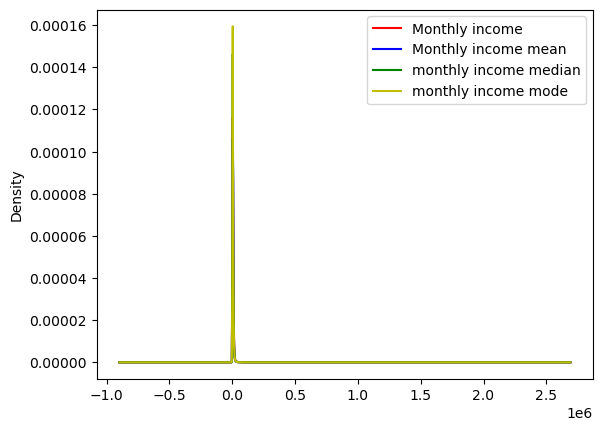

In [32]:
# checking std and distribution and then we will decide

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

training_data["MonthlyIncome"].plot(kind="kde",ax=ax,color="r",label="Monthly income")
training_data["MonthlyIncome_mean"].plot(kind="kde",ax=ax,color="b",label="Monthly income mean")
training_data["MonthlyIncome_median"].plot(kind="kde",ax=ax,color="g",label="monthly income median")
training_data["MonthlyIncome_mode"].plot(kind="kde",ax=ax,color="y",label="monthly income mode")
plt.legend(loc=0)
plt.show()

In [33]:
print("std for original feature: ",training_data["MonthlyIncome"].std())
print("std for mean feature: ",training_data["MonthlyIncome_mean"].std())
print("std for median feature: ",training_data["MonthlyIncome_median"].std())
print("std for mode feature: ",training_data["MonthlyIncome_mode"].std())

std for original feature:  12382.00036449975
std for mean feature:  11090.888811194223
std for median feature:  11102.22040556871
std for mode feature:  11110.55550843074


#### Since std is very close Iam selecting mode for replacing Null value in Monthly Income column


In [34]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mean,MonthlyIncome_mode,MonthlyIncome_median
87935,0.0,0.889997,60.0,Male,Central,NaN,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good,6659.22741,5000.0,5400.0
3892,0.0,1.000000,34.0,Female,South,4325.0,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good,4325.00000,4325.0,4325.0
41404,0.0,1.000000,25.0,Male,North,2317.0,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good,2317.00000,2317.0,2317.0
91124,0.0,0.320767,59.0,Male,Central,4666.0,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good,4666.00000,4666.0,4666.0
67372,1.0,1.000000,54.0,Male,West,NaN,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad,6659.22741,5000.0,5400.0


In [35]:
training_data=training_data.drop(["MonthlyIncome","MonthlyIncome_mean","MonthlyIncome_median"],axis=1)

In [36]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mode
87935,0.0,0.889997,60.0,Male,Central,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good,5000.0
3892,0.0,1.000000,34.0,Female,South,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good,4325.0
41404,0.0,1.000000,25.0,Male,North,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good,2317.0
91124,0.0,0.320767,59.0,Male,Central,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good,4666.0
67372,1.0,1.000000,54.0,Male,West,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad,5000.0


In [37]:
#but in testing data also we have monthly income feature

testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           9865
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1235
Good_Bad                                   0
dtype: int64

In [38]:
#Monthly income null values in test data should be replaced with mode value because it has been replaced  with mode in train data
testing_data["MonthlyIncome_mode"]=testing_data["MonthlyIncome"].fillna(mode_1[0])

In [39]:
testing_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mode
59770,0.0,1.000000,30.0,Male,Central,NaN,Rented,Self_Emp,Professional,0.0,44.000000,0.0,0.0,0.0,0.0,0.0,Good,5000.0
21362,0.0,0.000000,57.0,Female,North,7750.0,Rented,Officer3,Post-Grad,0.0,0.142562,9.0,0.0,1.0,0.0,0.0,Good,7750.0
127324,0.0,0.036569,48.0,Female,East,6000.0,Rented,Officer1,Post-Grad,0.0,0.236294,6.0,0.0,2.0,0.0,3.0,Good,6000.0
140509,0.0,1.018331,41.0,Male,West,4958.0,Rented,Non-officer,Professional,0.0,0.163138,4.0,0.0,0.0,0.0,0,Good,4958.0
144297,0.0,1.008799,49.0,Male,West,NaN,Rented,Officer2,Professional,0.0,3942.000000,10.0,0.0,1.0,0.0,0,Good,5000.0


In [40]:
testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           9865
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1235
Good_Bad                                   0
MonthlyIncome_mode                         0
dtype: int64

In [41]:
# come back to training data

training_data.isnull().sum()


NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      2689
Good_Bad                                   0
MonthlyIncome_mode                         0
dtype: int64

In [42]:
# handling missing values for number of dependents 

training_data["NumberOfDependents"].dtype

dtype('O')

In [43]:
training_data["NumberOfDependents"].head()

87935    0.0
3892     0.0
41404    0.0
91124    0.0
67372    NaN
Name: NumberOfDependents, dtype: object

In [44]:
# convert categorical to numerical 

training_data["NumberOfDependents"]=pd.to_numeric(training_data["NumberOfDependents"])

In [45]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mode
87935,0.0,0.889997,60.0,Male,Central,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good,5000.0
3892,0.0,1.000000,34.0,Female,South,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good,4325.0
41404,0.0,1.000000,25.0,Male,North,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good,2317.0
91124,0.0,0.320767,59.0,Male,Central,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good,4666.0
67372,1.0,1.000000,54.0,Male,West,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad,5000.0


In [46]:
training_data["NumberOfDependents"].dtype

dtype('float64')

In [47]:
mean_2=training_data["NumberOfDependents"].mean()
median_2=training_data["NumberOfDependents"].median()
mode_2=training_data["NumberOfDependents"].mode()

print(f"The Mean value of NumberOfDependents = {mean_2}")
print(f"The Median of NumberOfDependents = {median_2}")
print(f"The Mode of NumberOfDependents={mode_2[0]}")

The Mean value of NumberOfDependents = 0.7641574056087761
The Median of NumberOfDependents = 0.0
The Mode of NumberOfDependents=0.0


In [48]:
# replacing the null values and finding the best one
values={"mean":mean_2,"median":median_2,"mode":mode_2[0]}
for key,value in values.items():
    replace(training_data,"NumberOfDependents",key,value)

In [49]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mode,NumberOfDependents_mean,NumberOfDependents_median,NumberOfDependents_mode
87935,0.0,0.889997,60.0,Male,Central,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good,5000.0,0.000000,0.0,0.0
3892,0.0,1.000000,34.0,Female,South,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good,4325.0,0.000000,0.0,0.0
41404,0.0,1.000000,25.0,Male,North,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good,2317.0,0.000000,0.0,0.0
91124,0.0,0.320767,59.0,Male,Central,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good,4666.0,0.000000,0.0,0.0
67372,1.0,1.000000,54.0,Male,West,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad,5000.0,0.764157,0.0,0.0


In [50]:
training_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      2689
Good_Bad                                   0
MonthlyIncome_mode                         0
NumberOfDependents_mean                    0
NumberOfDependents_median                  0
NumberOfDependents_mode                    0
dtype: int64

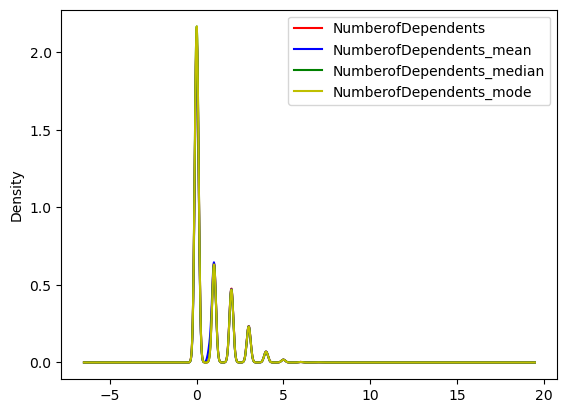

In [51]:
# check for std and distribution among them

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

training_data["NumberOfDependents"].plot(kind="kde",ax=ax,color="r",label="NumberofDependents")
training_data["NumberOfDependents_mean"].plot(kind="kde",ax=ax,color="b",label="NumberofDependents_mean")
training_data["NumberOfDependents_median"].plot(kind="kde",ax=ax,color="g",label="NumberofDependents_median")
training_data["NumberOfDependents_mode"].plot(kind="kde",ax=ax,color="y",label="NumberofDependents_mode")

plt.legend(loc=0)
plt.show()

In [52]:
print("Std for Original feature :  ",training_data["NumberOfDependents"].std())
print("Std for mean feature : ",training_data["NumberOfDependents_mean"].std())
print("Std for median feature: ",training_data["NumberOfDependents_median"].std())
print("Std for mode feature : ",training_data["NumberOfDependents_mode"].std())

Std for Original feature :   1.118102950299523
Std for mean feature :  1.1030432788402802
Std for median feature:  1.1099146466320464
Std for mode feature :  1.1099146466320464


In [53]:
# since everything is good for  std , i just take mean and ignore mode and median to replace 

training_data=training_data.drop(["NumberOfDependents","NumberOfDependents_median","NumberOfDependents_mode"],axis=1)


In [54]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad,MonthlyIncome_mode,NumberOfDependents_mean
87935,0.0,0.889997,60.0,Male,Central,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,Good,5000.0,0.000000
3892,0.0,1.000000,34.0,Female,South,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,Good,4325.0,0.000000
41404,0.0,1.000000,25.0,Male,North,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,Good,2317.0,0.000000
91124,0.0,0.320767,59.0,Male,Central,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,Good,4666.0,0.000000
67372,1.0,1.000000,54.0,Male,West,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,Bad,5000.0,0.764157


In [55]:
training_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
MonthlyIncome_mode                      0
NumberOfDependents_mean                 0
dtype: int64

In [56]:
# replace the null values in testing data for column NumberofDependents 
testing_data["NumberOfDependents"]=pd.to_numeric(testing_data["NumberOfDependents"])
testing_data["NumberOfDependents_mean"]=testing_data["NumberOfDependents"].fillna(mean_2)

In [57]:
testing_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mode,NumberOfDependents_mean
59770,0.0,1.000000,30.0,Male,Central,NaN,Rented,Self_Emp,Professional,0.0,44.000000,0.0,0.0,0.0,0.0,0.0,Good,5000.0,0.0
21362,0.0,0.000000,57.0,Female,North,7750.0,Rented,Officer3,Post-Grad,0.0,0.142562,9.0,0.0,1.0,0.0,0.0,Good,7750.0,0.0
127324,0.0,0.036569,48.0,Female,East,6000.0,Rented,Officer1,Post-Grad,0.0,0.236294,6.0,0.0,2.0,0.0,3.0,Good,6000.0,3.0
140509,0.0,1.018331,41.0,Male,West,4958.0,Rented,Non-officer,Professional,0.0,0.163138,4.0,0.0,0.0,0.0,0.0,Good,4958.0,0.0
144297,0.0,1.008799,49.0,Male,West,NaN,Rented,Officer2,Professional,0.0,3942.000000,10.0,0.0,1.0,0.0,0.0,Good,5000.0,0.0


In [58]:
testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           9865
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1235
Good_Bad                                   0
MonthlyIncome_mode                         0
NumberOfDependents_mean                    0
dtype: int64

In [59]:
testing_data["NumberOfDependents_mean"].dtype

dtype('float64')

In [60]:
testing_data=testing_data.drop(["NumberOfDependents","MonthlyIncome"],axis=1)

In [61]:
testing_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad,MonthlyIncome_mode,NumberOfDependents_mean
59770,0.0,1.000000,30.0,Male,Central,Rented,Self_Emp,Professional,0.0,44.000000,0.0,0.0,0.0,0.0,Good,5000.0,0.0
21362,0.0,0.000000,57.0,Female,North,Rented,Officer3,Post-Grad,0.0,0.142562,9.0,0.0,1.0,0.0,Good,7750.0,0.0
127324,0.0,0.036569,48.0,Female,East,Rented,Officer1,Post-Grad,0.0,0.236294,6.0,0.0,2.0,0.0,Good,6000.0,3.0
140509,0.0,1.018331,41.0,Male,West,Rented,Non-officer,Professional,0.0,0.163138,4.0,0.0,0.0,0.0,Good,4958.0,0.0
144297,0.0,1.008799,49.0,Male,West,Rented,Officer2,Professional,0.0,3942.000000,10.0,0.0,1.0,0.0,Good,5000.0,0.0


In [62]:
testing_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
MonthlyIncome_mode                      0
NumberOfDependents_mean                 0
dtype: int64

In [63]:
training_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
MonthlyIncome_mode                      0
NumberOfDependents_mean                 0
dtype: int64

### here we solved for null values for training and testing data , now we need to check for outliers in train and test data for numerical columns

#### checking Normal Distribution for each Numerical feature in train and test data

In [64]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100500 entries, 87935 to 121958
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            100500 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  100500 non-null  float64
 2   age                                   100500 non-null  float64
 3   Gender                                100500 non-null  object 
 4   Region                                100500 non-null  object 
 5   Rented_OwnHouse                       100500 non-null  object 
 6   Occupation                            100500 non-null  object 
 7   Education                             100500 non-null  object 
 8   NumberOfTime30-59DaysPastDueNotWorse  100500 non-null  float64
 9   DebtRatio                             100500 non-null  float64
 10  NumberOfOpenCreditLinesAndLoans       100500 non-null  float64
 

In [65]:
# out of 17 feature in training data, i want only numerical features for handling data
training_data_numerical=training_data.select_dtypes(exclude="object")

In [66]:
training_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100500 entries, 87935 to 121958
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            100500 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  100500 non-null  float64
 2   age                                   100500 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  100500 non-null  float64
 4   DebtRatio                             100500 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       100500 non-null  float64
 6   NumberOfTimes90DaysLate               100500 non-null  float64
 7   NumberRealEstateLoansOrLines          100500 non-null  float64
 8   NumberOfTime60-89DaysPastDueNotWorse  100500 non-null  float64
 9   MonthlyIncome_mode                    100500 non-null  float64
 10  NumberOfDependents_mean               100500 non-null  float64
d

In [67]:
import seaborn as sns

<AxesSubplot:xlabel='NPA Status', ylabel='Density'>

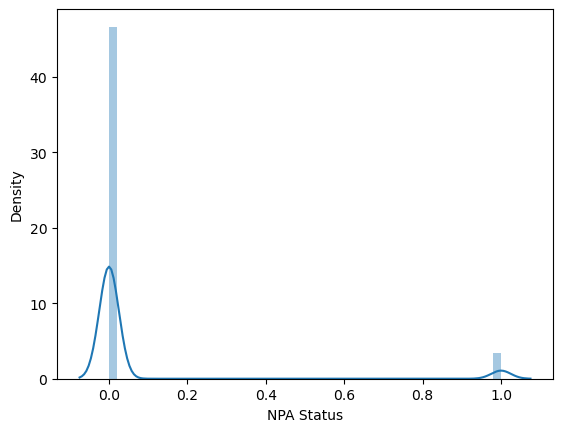

In [68]:
sns.distplot(training_data_numerical["NPA Status"])

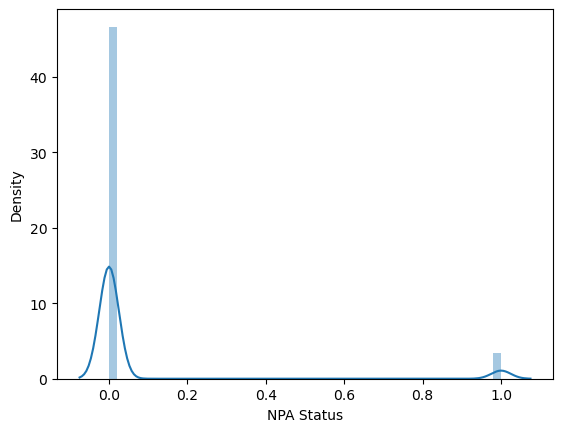

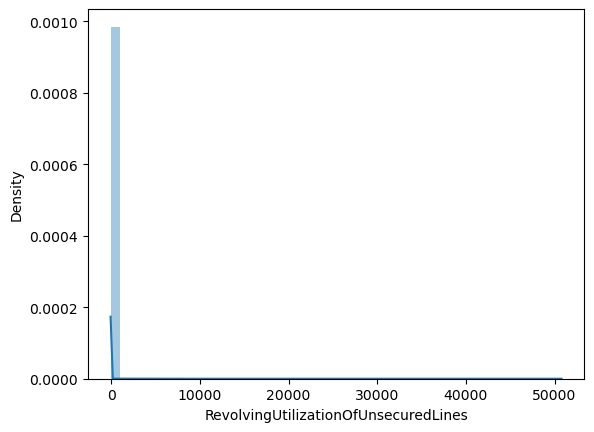

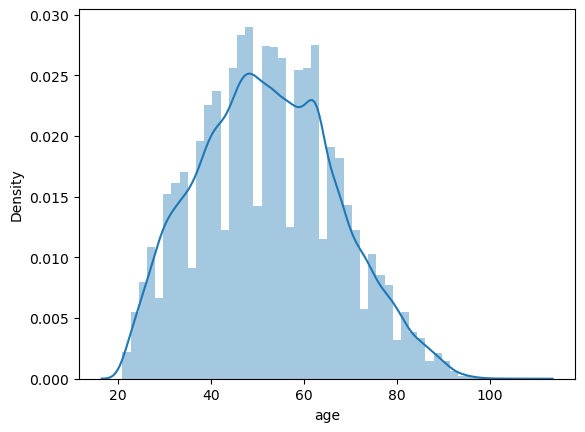

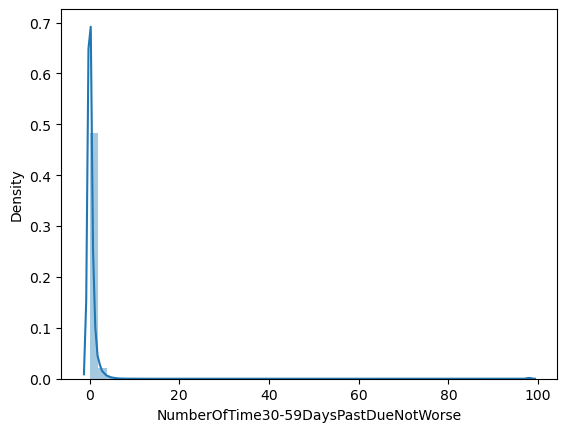

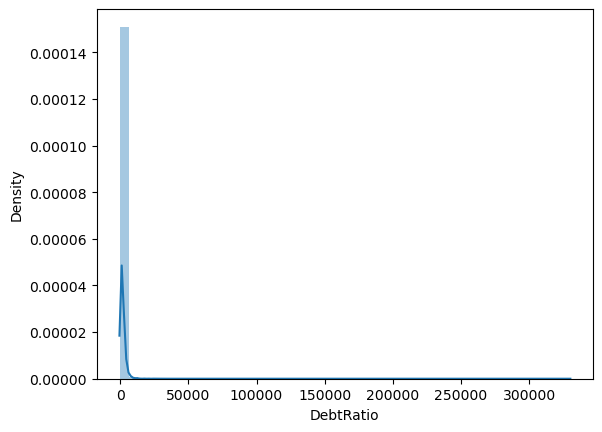

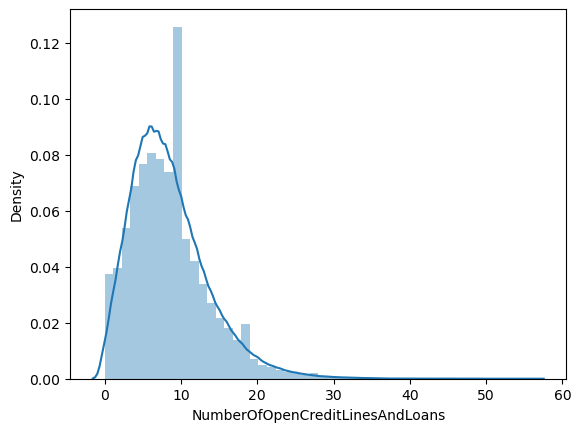

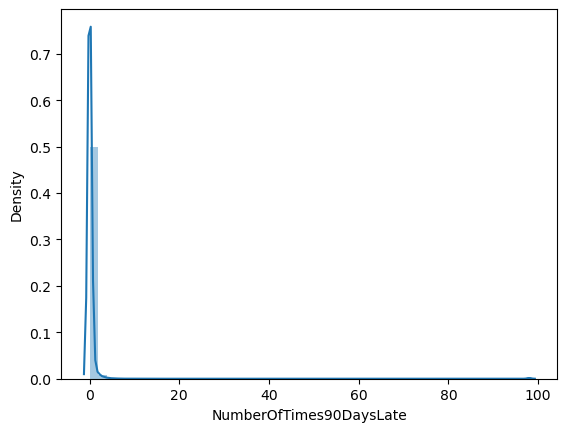

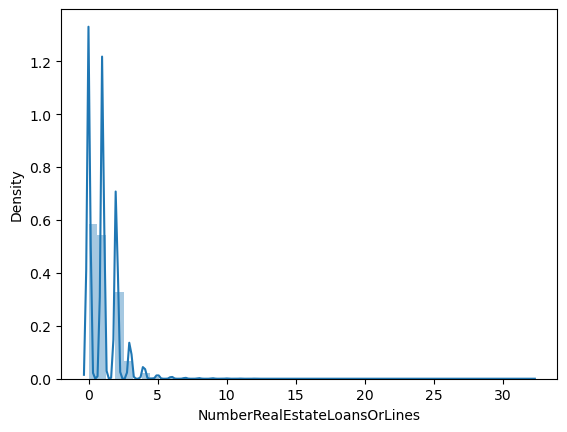

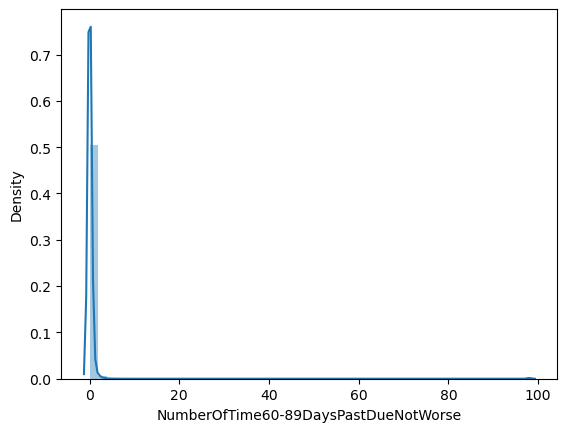

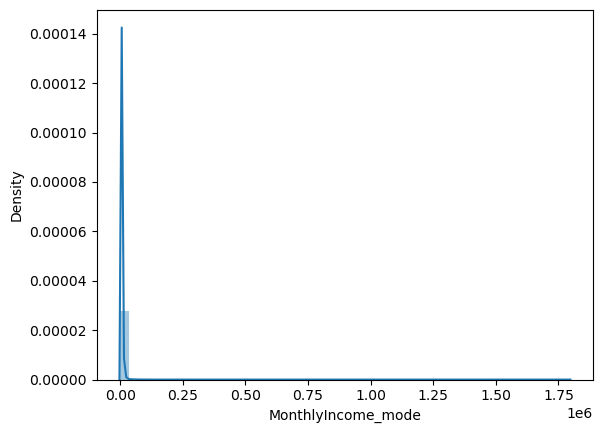

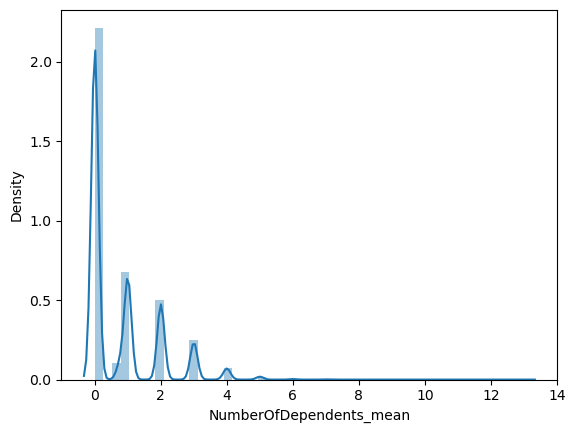

In [69]:
for i in training_data_numerical.columns:
    sns.distplot(training_data_numerical[i])
    plt.show()

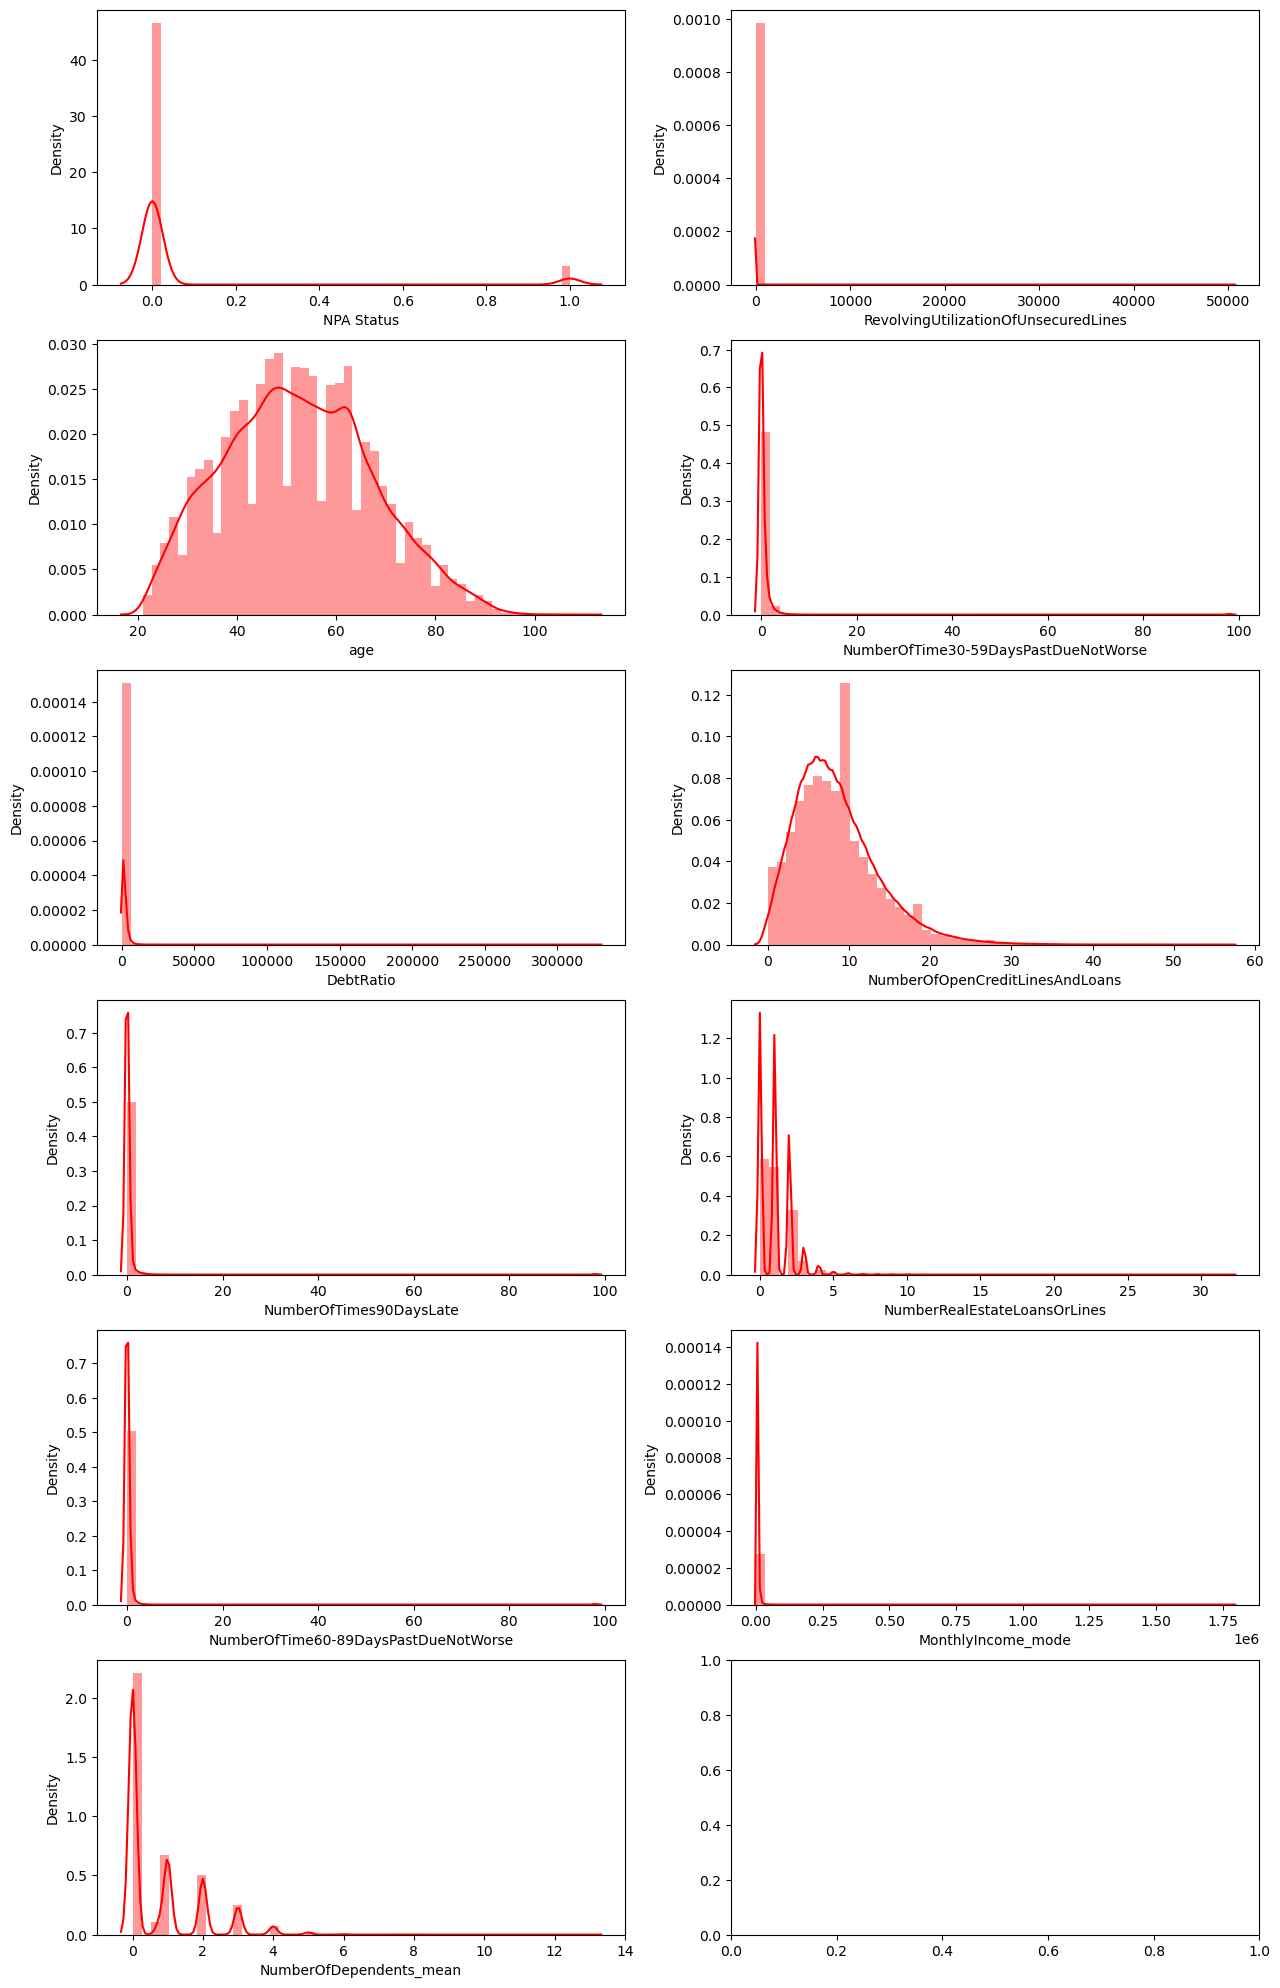

In [70]:
f=training_data_numerical.columns

fig , ax = plt.subplots(6,2,figsize=(15,25))

for i , subplot in zip(f,ax.flatten()):
    sns.distplot(training_data_numerical[i],ax=subplot,color="r")

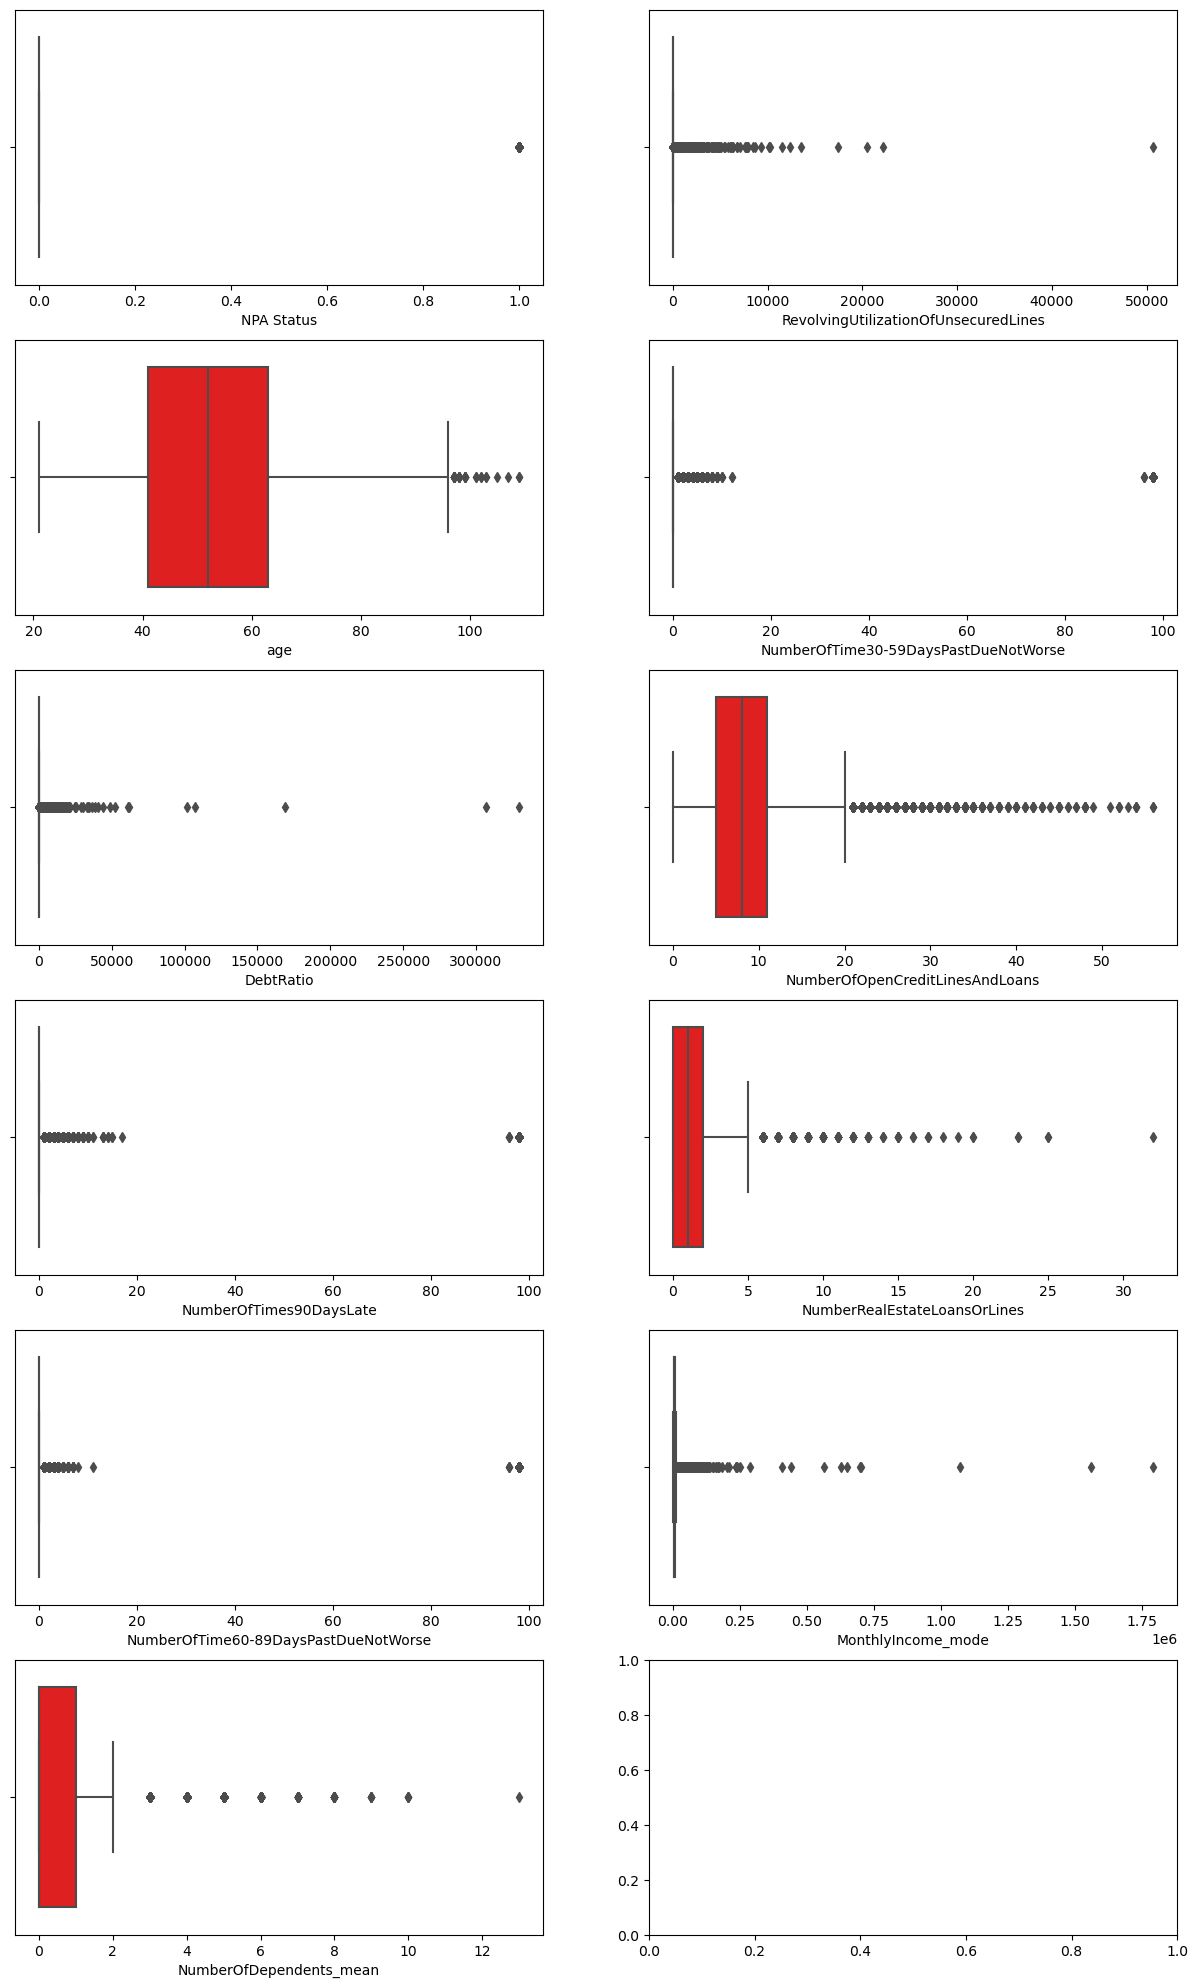

In [71]:
fig , ax = plt.subplots(6,2,figsize=(15,25))

for i , subplot in zip(f,ax.flatten()):
    sns.boxplot(x=training_data_numerical[i],ax=subplot,color="r")

### Now we got a clear idea of training numerical data , so iam going to handle outliers 
- for handling outliers iam using variable transformation technique:

### Using Variable Yeojohnson technique i will try to solve outliers


In [72]:
training_data_numerical.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_mean'],
      dtype='object')

In [73]:
from scipy import stats

In [74]:
def vt(training_data_numerical,var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.title("Boxplot")
    sns.boxplot(x=training_data_numerical[var])
    plt.subplot(1,3,2)
    plt.title("Hist")
    plt.hist(training_data_numerical[var])
    plt.subplot(1,3,3)
    plt.title("Prob plot")
    stats.probplot(training_data_numerical[var],plot=plt)
    

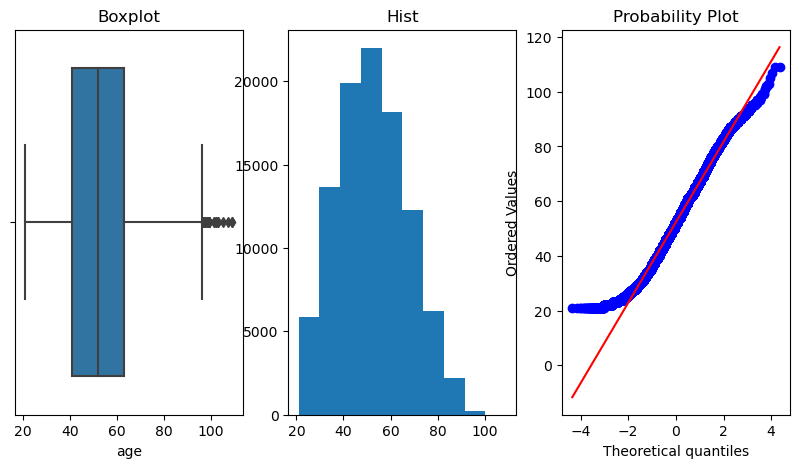

In [75]:
vt(training_data_numerical,"age")

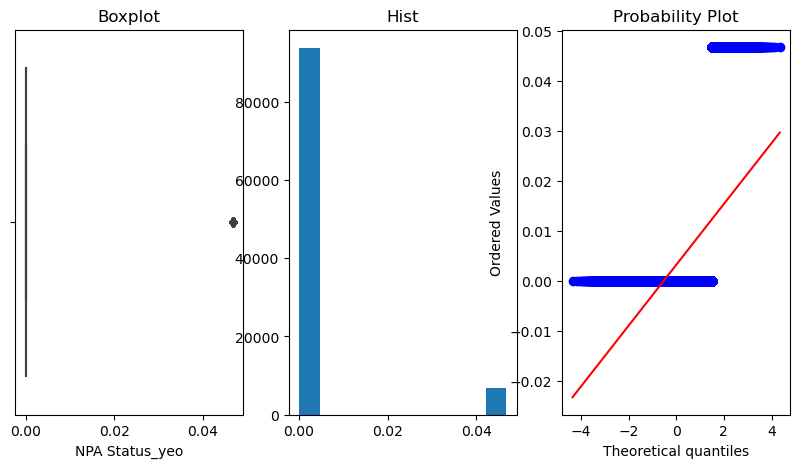

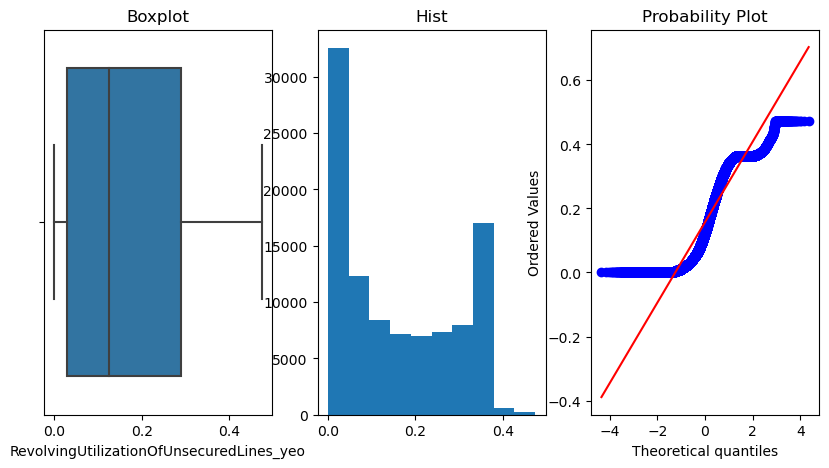

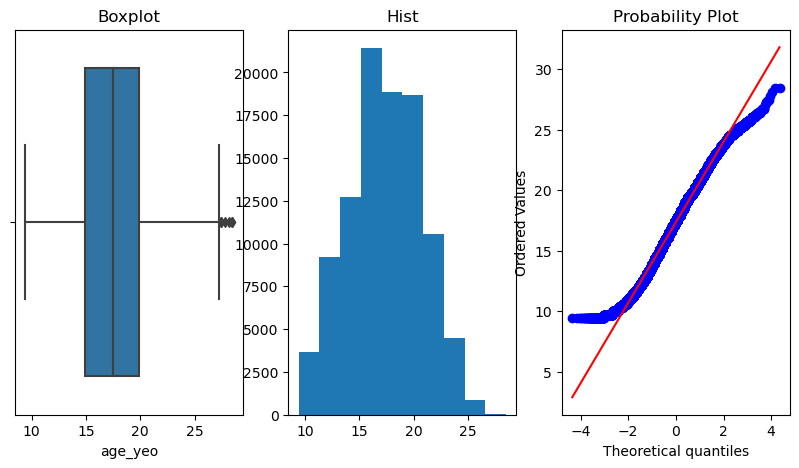

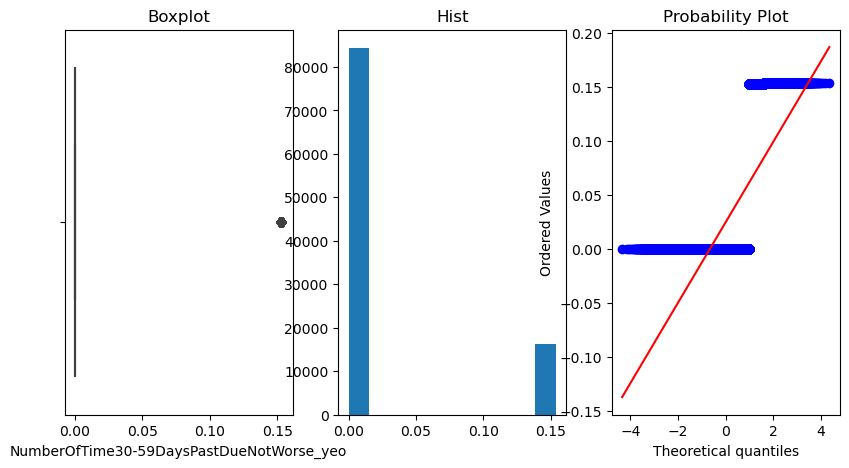

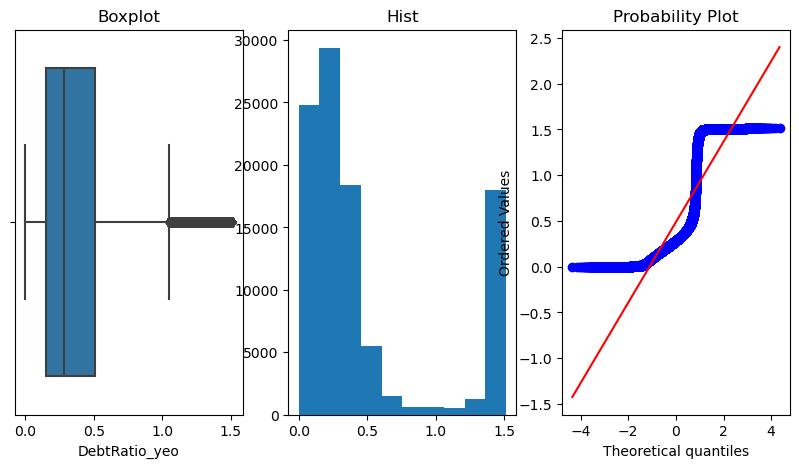

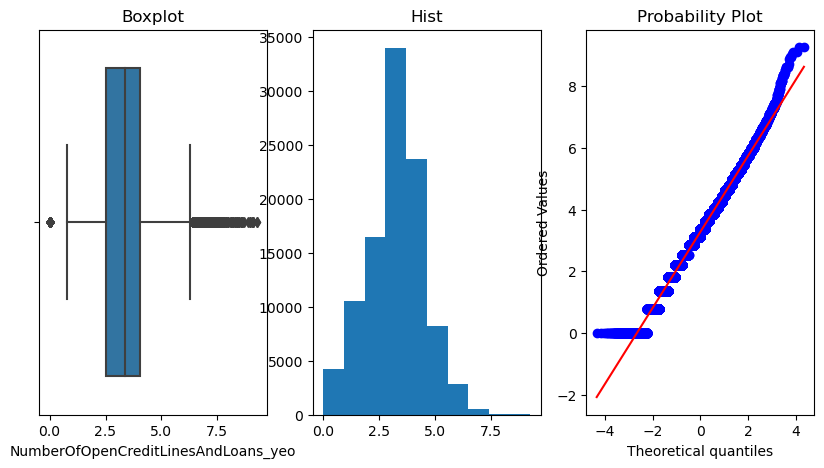

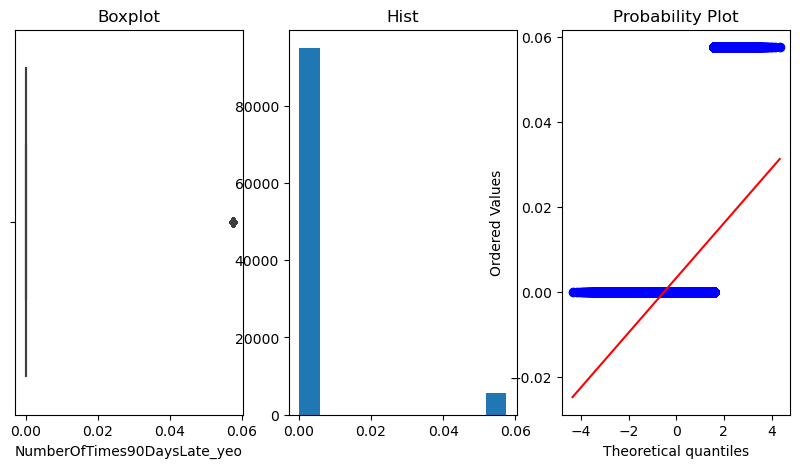

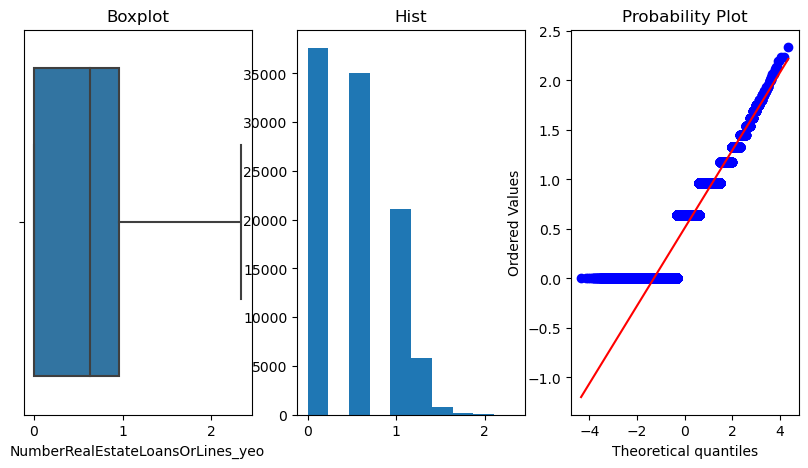

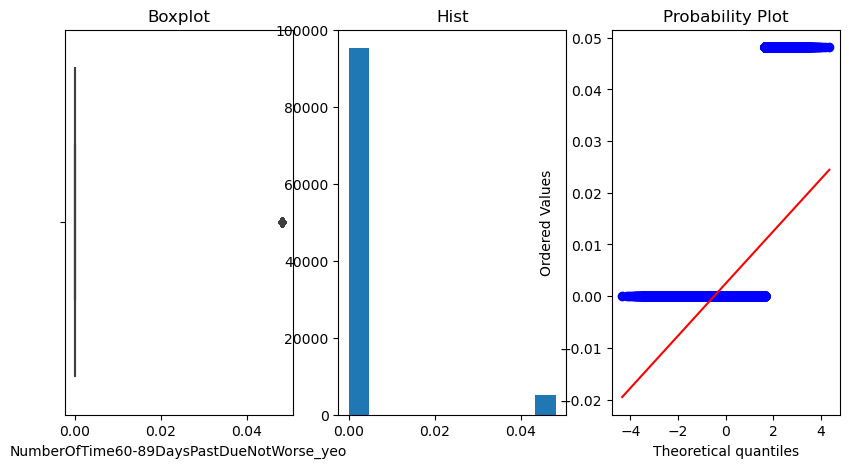

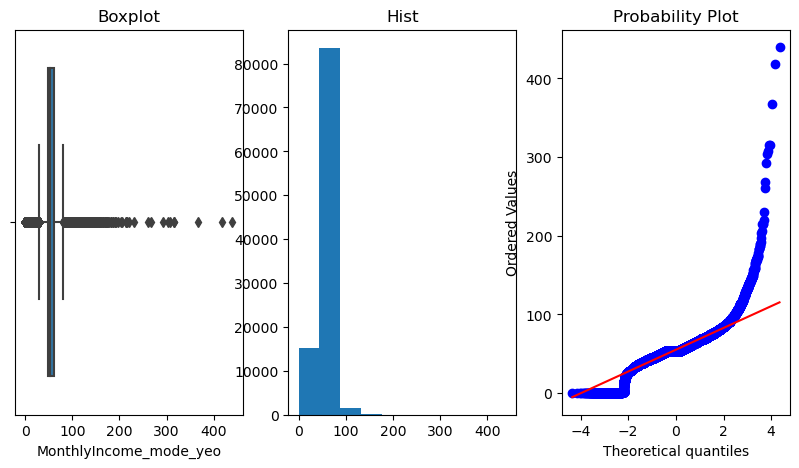

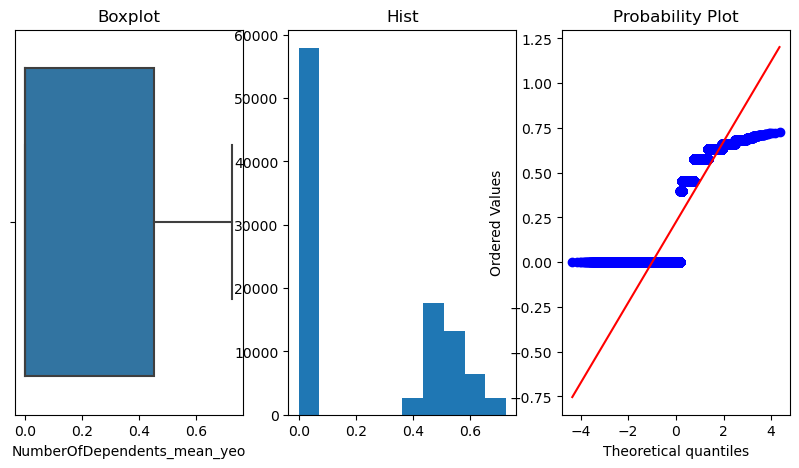

In [76]:
# Above is for just checking the distribution now Iam using YeoJohnson Technique and transform the data in each numerical feature in training data

for i in training_data_numerical.columns:
    training_data_numerical[i+"_yeo"],alpa=stats.yeojohnson(training_data_numerical[i])
    vt(training_data_numerical,i+"_yeo")

In [77]:
training_data_numerical.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_mode,...,RevolvingUtilizationOfUnsecuredLines_yeo,age_yeo,NumberOfTime30-59DaysPastDueNotWorse_yeo,DebtRatio_yeo,NumberOfOpenCreditLinesAndLoans_yeo,NumberOfTimes90DaysLate_yeo,NumberRealEstateLoansOrLines_yeo,NumberOfTime60-89DaysPastDueNotWorse_yeo,MonthlyIncome_mode_yeo,NumberOfDependents_mean_yeo
87935,0.0,0.889997,60.0,0.0,2252.000000,5.0,0.0,0.0,0.0,5000.0,...,0.350057,19.218351,-0.000000,1.504149,2.531923,-0.000000,-0.000000,-0.000000,53.536898,-0.000000
3892,0.0,1.000000,34.0,0.0,0.058946,2.0,0.0,0.0,0.0,4325.0,...,0.363958,13.121298,-0.000000,0.056204,1.352347,-0.000000,-0.000000,-0.000000,50.744568,-0.000000
41404,0.0,1.000000,25.0,0.0,0.153581,2.0,0.0,0.0,0.0,2317.0,...,0.363958,10.629580,-0.000000,0.136334,1.352347,-0.000000,-0.000000,-0.000000,40.222715,-0.000000
91124,0.0,0.320767,59.0,0.0,0.401757,7.0,0.0,2.0,0.0,4666.0,...,0.210385,19.004802,-0.000000,0.302696,3.116456,-0.000000,0.961442,-0.000000,52.188052,-0.000000
67372,1.0,1.000000,54.0,3.0,779.000000,5.0,2.0,1.0,2.0,5000.0,...,0.363958,17.916249,0.153688,1.494790,2.531923,0.057516,0.636748,0.048194,53.536898,0.398009


In [78]:
training_data_numerical.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_mean', 'NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo'],
      dtype='object')

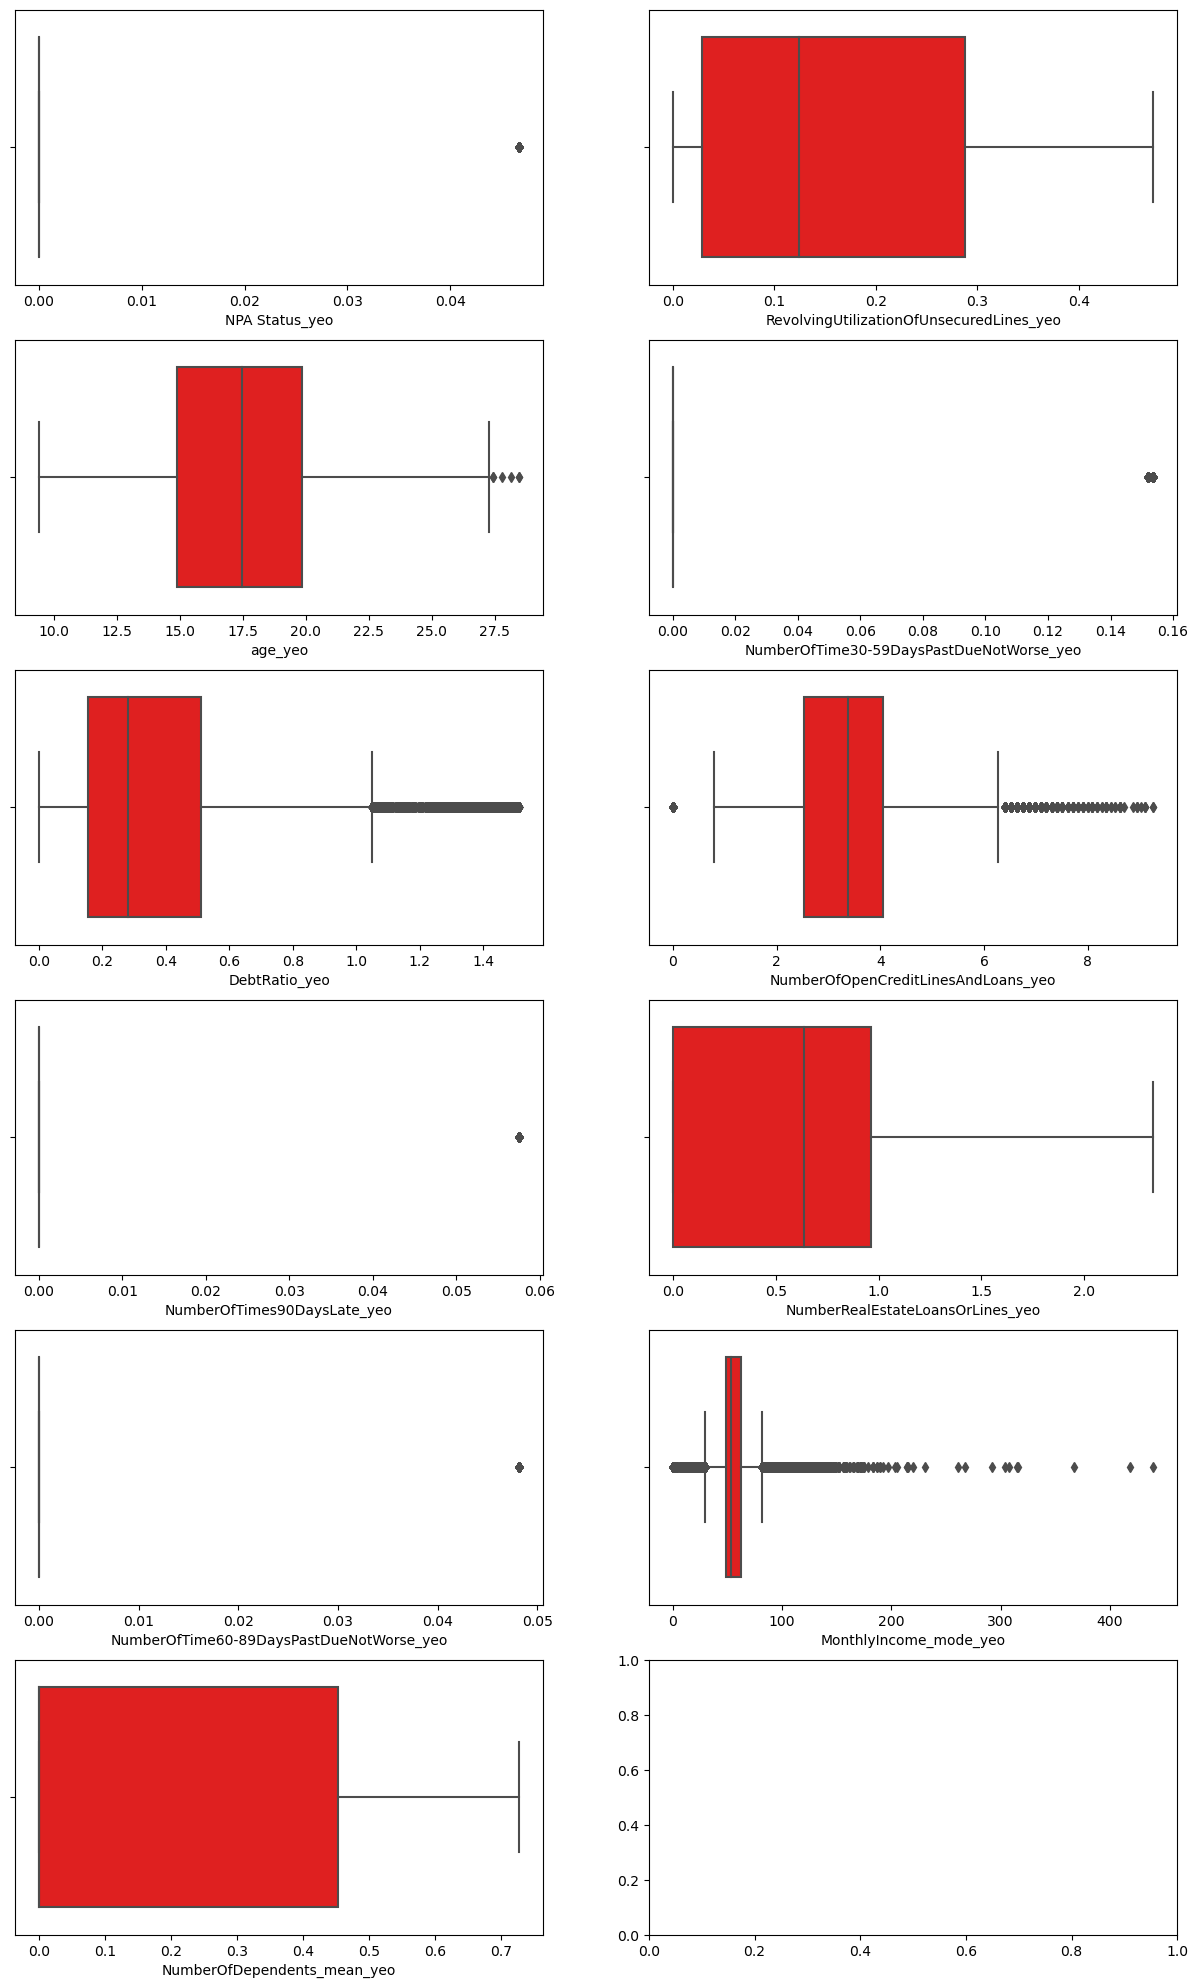

In [79]:
fig , ax = plt.subplots(6,2,figsize=(15,25))
f=['NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo']
for i , subplot in zip(f,ax.flatten()):
    sns.boxplot(x=training_data_numerical[i],ax=subplot,color="r")

In [80]:
# since before and after transformation i find out that there are some features where it holding unique values



In [81]:
f[0],f[3],f[6],f[8]

('NPA Status_yeo',
 'NumberOfTime30-59DaysPastDueNotWorse_yeo',
 'NumberOfTimes90DaysLate_yeo',
 'NumberOfTime60-89DaysPastDueNotWorse_yeo')

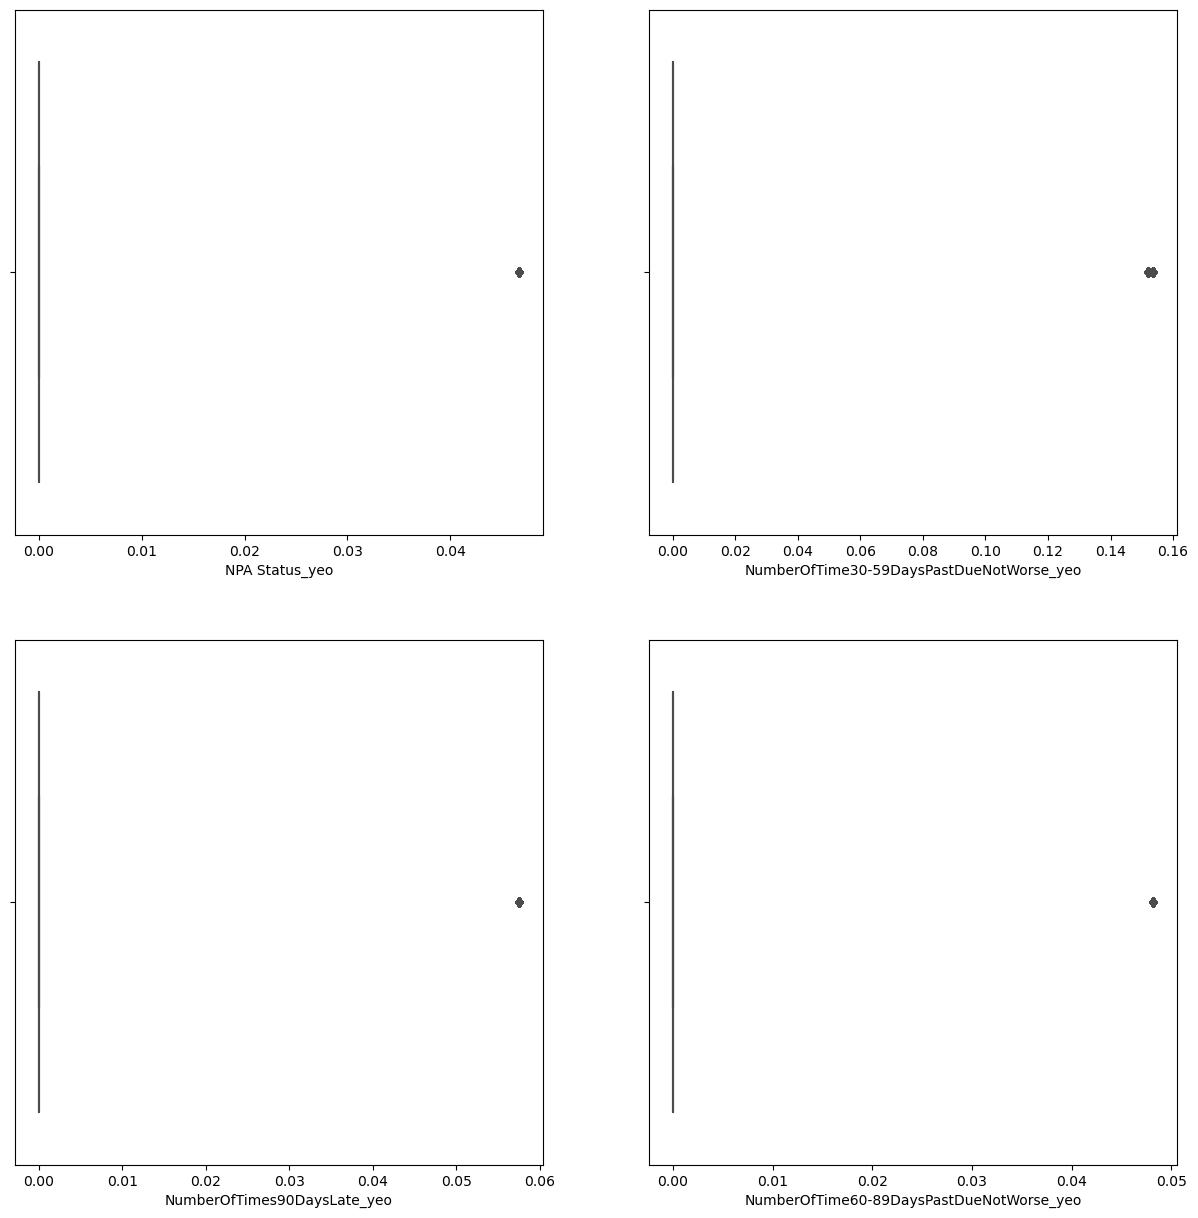

In [82]:
### working on only unique value features;

c=['NPA Status_yeo',
 'NumberOfTime30-59DaysPastDueNotWorse_yeo',
 'NumberOfTimes90DaysLate_yeo',
 'NumberOfTime60-89DaysPastDueNotWorse_yeo']
fig,ax = plt.subplots(2,2,figsize=(15,15))
for i,subplot in zip(c,ax.flatten()):
    sns.boxplot(x=training_data_numerical[i],ax=subplot,color="r")

In [83]:
# lets see what are the unique values :
for i in c:
    print("Number of unique of values ",i ,training_data_numerical[i].unique())

Number of unique of values  NPA Status_yeo [-0.          0.04671352]
Number of unique of values  NumberOfTime30-59DaysPastDueNotWorse_yeo [-0.          0.15368769  0.15201502  0.15358536  0.15370194  0.1537062
  0.15370497  0.1537063   0.15370609  0.15370581  0.1537063   0.15370627
  0.15370625  0.15370629]
Number of unique of values  NumberOfTimes90DaysLate_yeo [-0.          0.0575158   0.05751547  0.0575158   0.0575158   0.0575158
  0.0575158   0.0575158   0.0575158 ]
Number of unique of values  NumberOfTime60-89DaysPastDueNotWorse_yeo [-0.          0.04819399  0.04819396  0.04819399  0.04819399  0.04819399
  0.04819399]


In [84]:
# here these columns are not much important cauz there is so much data, just this small data not effective,hence drop these features from training data
training_data_numerical=training_data_numerical.drop(c,axis=1)

In [85]:
training_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100500 entries, 87935 to 121958
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   NPA Status                                100500 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines      100500 non-null  float64
 2   age                                       100500 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse      100500 non-null  float64
 4   DebtRatio                                 100500 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans           100500 non-null  float64
 6   NumberOfTimes90DaysLate                   100500 non-null  float64
 7   NumberRealEstateLoansOrLines              100500 non-null  float64
 8   NumberOfTime60-89DaysPastDueNotWorse      100500 non-null  float64
 9   MonthlyIncome_mode                        100500 non-null  float64
 10  NumberOfDependen

In [86]:
training_data_numerical.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_mean',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo'],
      dtype='object')

In [87]:
training_data_numerical=training_data_numerical.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_mean'],axis=1)

In [88]:
training_data_numerical.head()

,RevolvingUtilizationOfUnsecuredLines_yeo,age_yeo,DebtRatio_yeo,NumberOfOpenCreditLinesAndLoans_yeo,NumberRealEstateLoansOrLines_yeo,MonthlyIncome_mode_yeo,NumberOfDependents_mean_yeo
87935,0.350057,19.218351,1.504149,2.531923,-0.000000,53.536898,-0.000000
3892,0.363958,13.121298,0.056204,1.352347,-0.000000,50.744568,-0.000000
41404,0.363958,10.629580,0.136334,1.352347,-0.000000,40.222715,-0.000000
91124,0.210385,19.004802,0.302696,3.116456,0.961442,52.188052,-0.000000
67372,0.363958,17.916249,1.494790,2.531923,0.636748,53.536898,0.398009


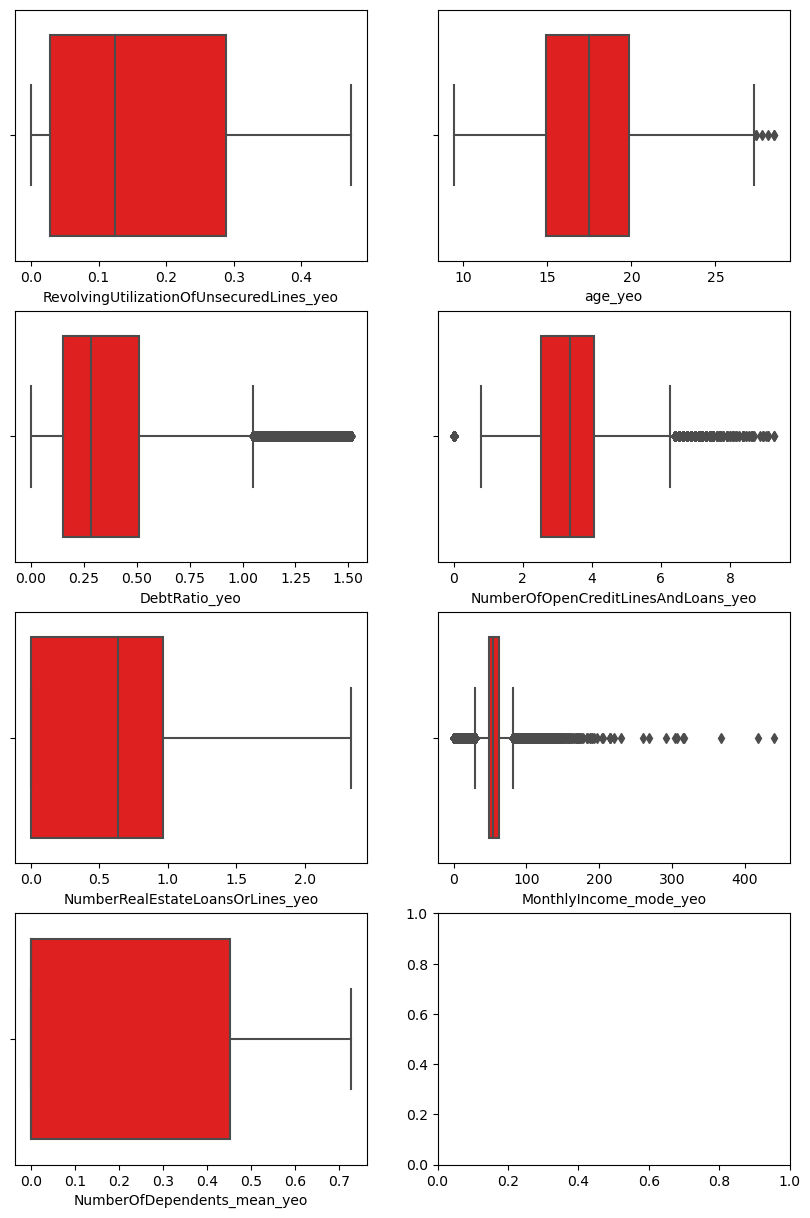

In [89]:
f=training_data_numerical.columns
fig,ax=plt.subplots(4,2,figsize=(10,15))
for i,subplot in zip(f,ax.flatten()):
    sns.boxplot(x=training_data_numerical[i],ax=subplot,color="r")

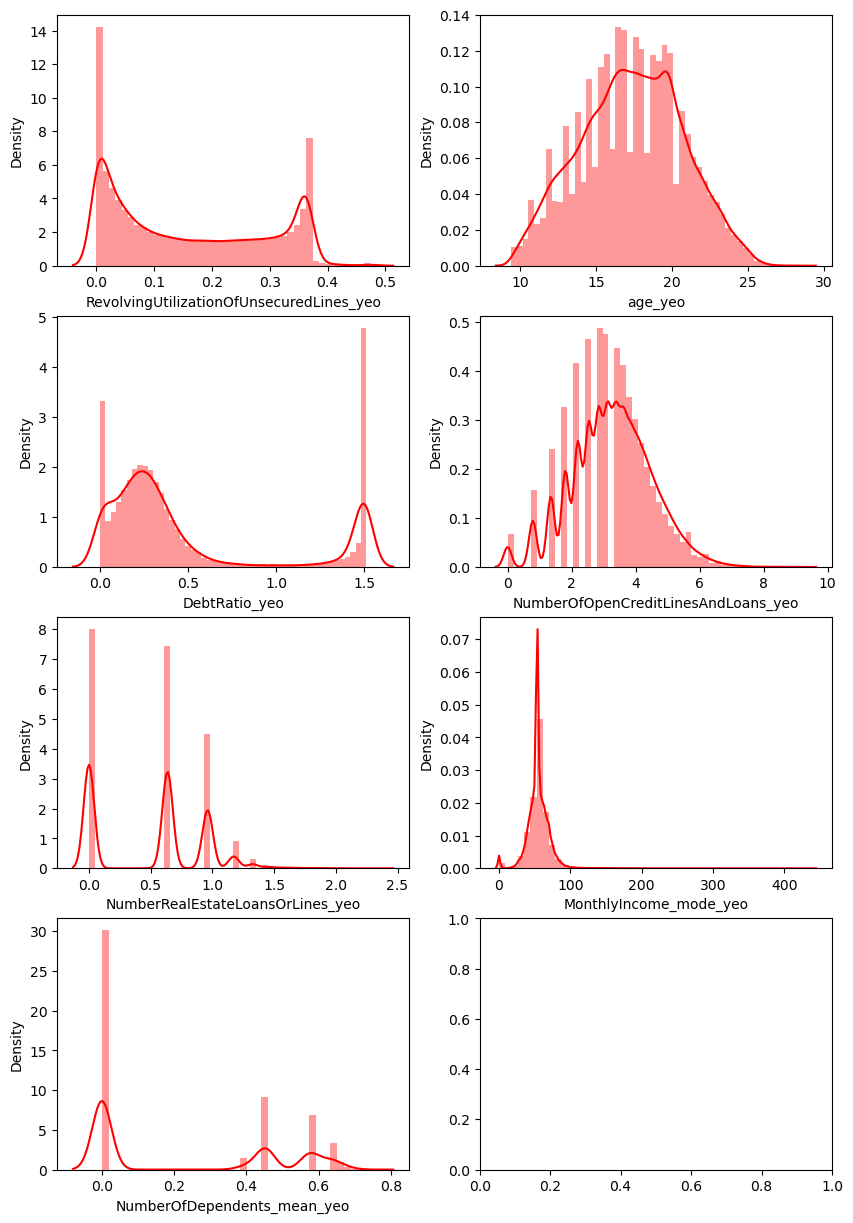

In [90]:
fig,ax=plt.subplots(4,2,figsize=(10,15))
for i,subplot in zip(f,ax.flatten()):
    sns.distplot(training_data_numerical[i],ax=subplot,color="r")

## same stuff iam going to place on test data:
- mainly focus on numerical data
- point 1 = check ND,BOxplot
- point 2 = Apply yeojohnson 
- point 3 = remove features which removed on train data
- point 4 = check the distribution

In [91]:
testing_data_numerical=testing_data.select_dtypes(exclude="object")

In [92]:
testing_data_numerical.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_mean'],
      dtype='object')

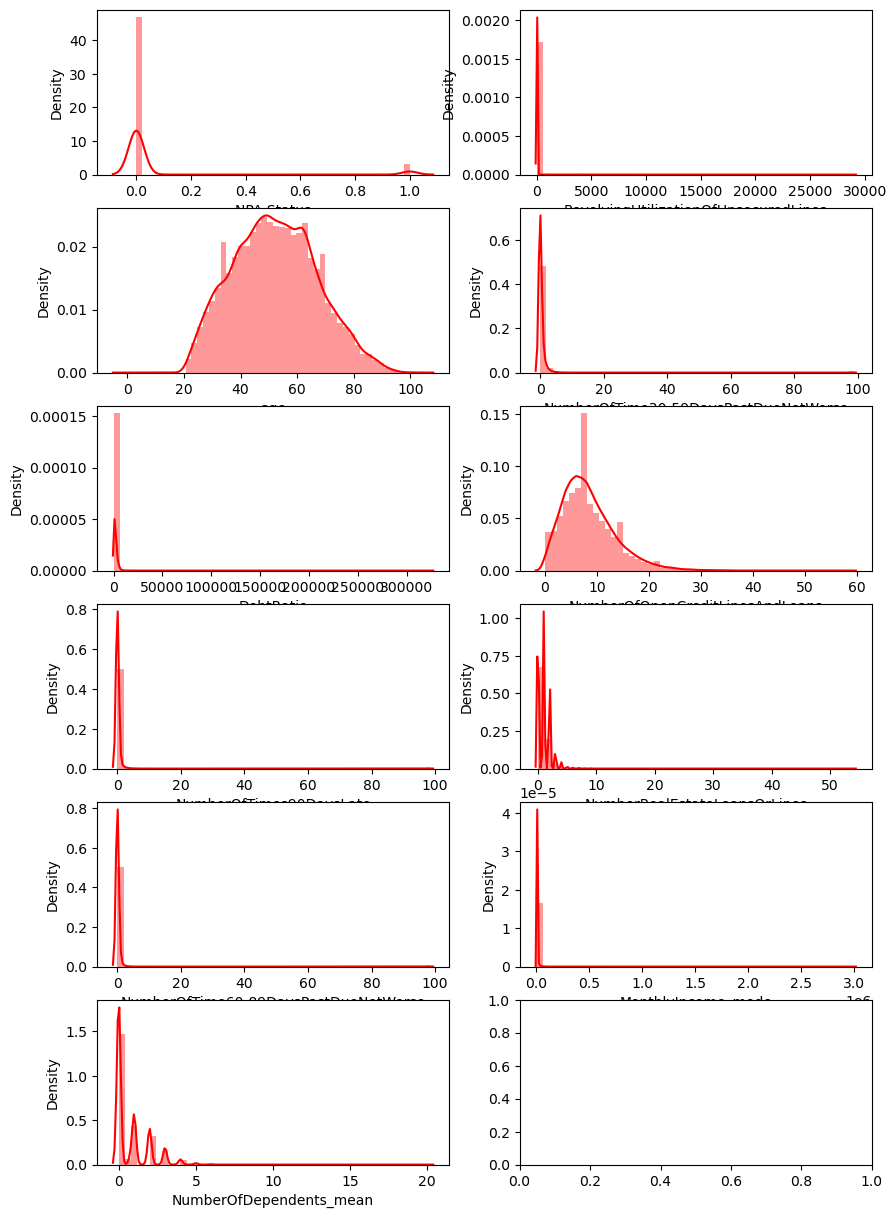

In [93]:
f=testing_data_numerical.columns
fig,ax=plt.subplots(6,2,figsize=(10,15))
for i, subplot in zip(f,ax.flatten()):
    sns.distplot(testing_data_numerical[i],ax=subplot,color="r")

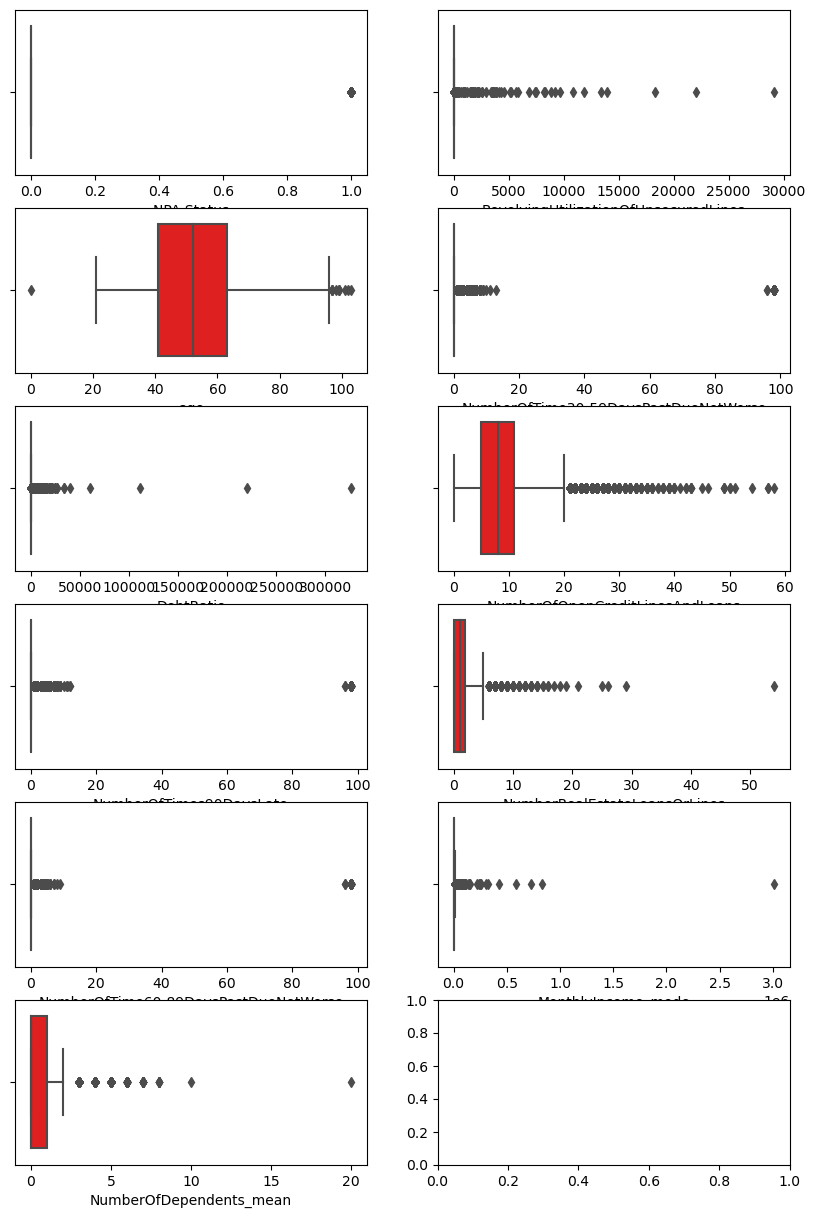

In [94]:
fig,ax=plt.subplots(6,2,figsize=(10,15))
for i,subplot in zip(f,ax.flatten()):
    sns.boxplot(x=testing_data_numerical[i],ax=subplot,color="r")

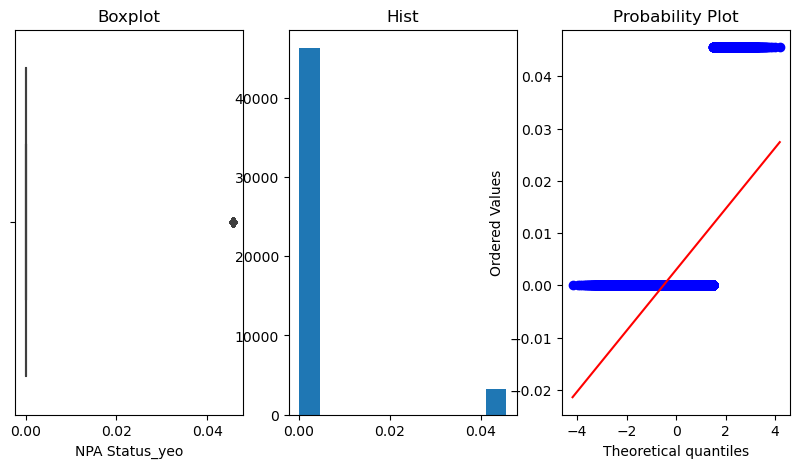

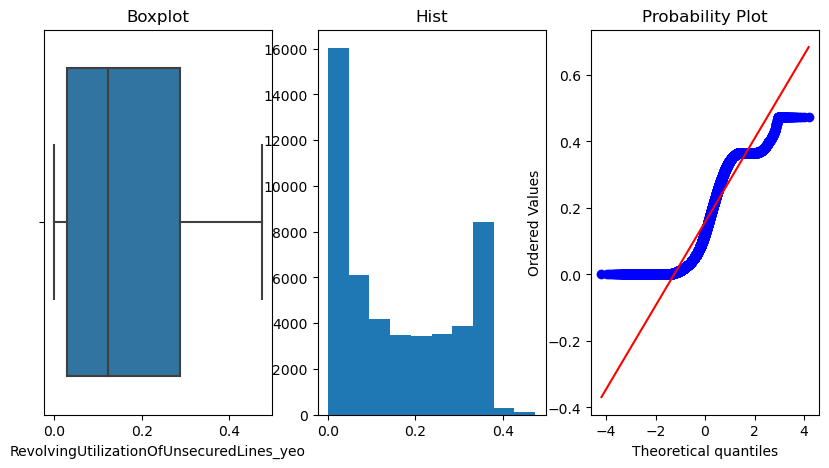

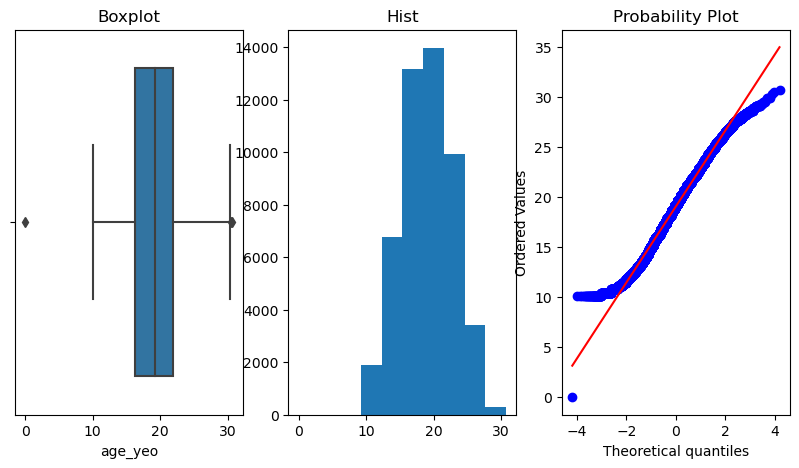

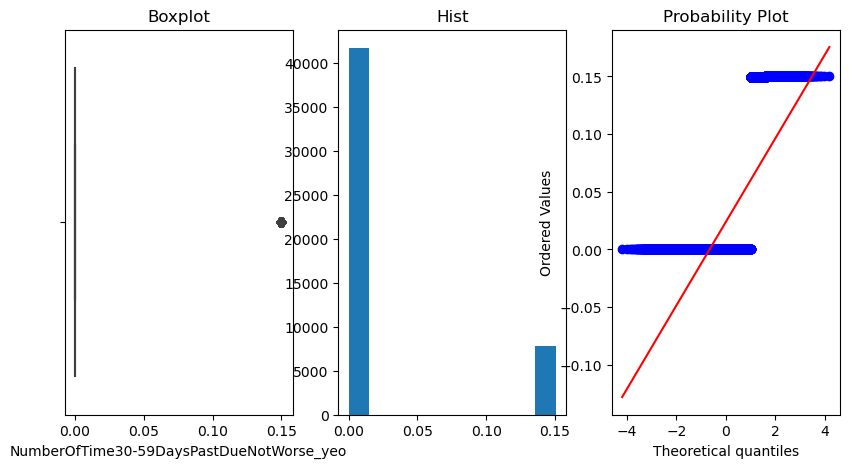

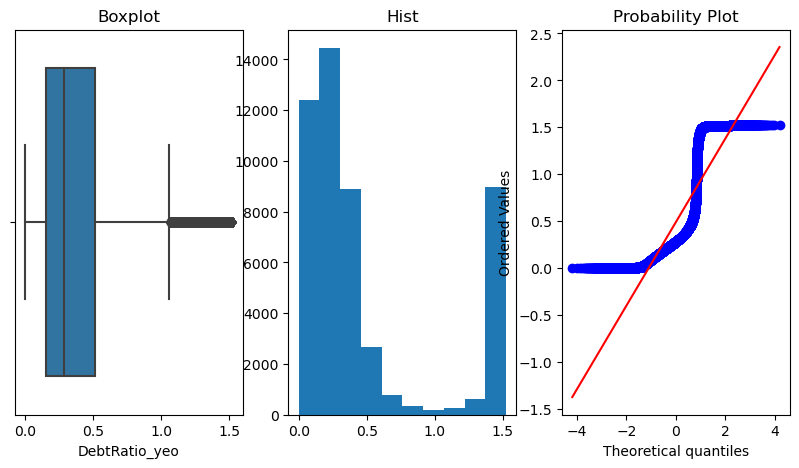

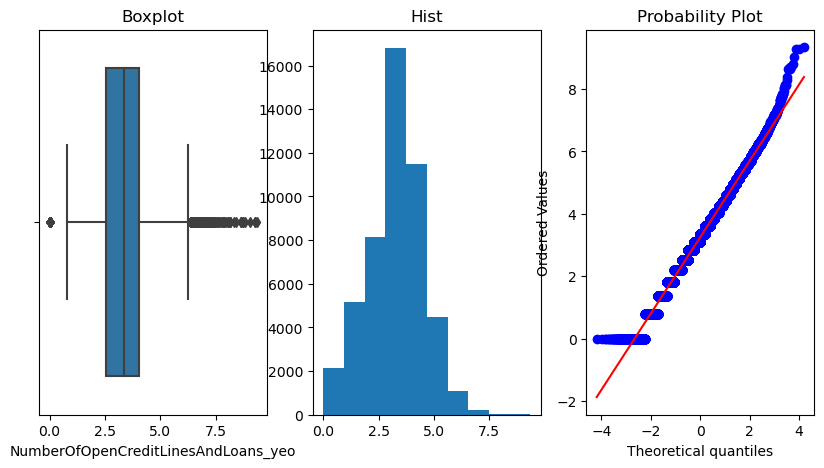

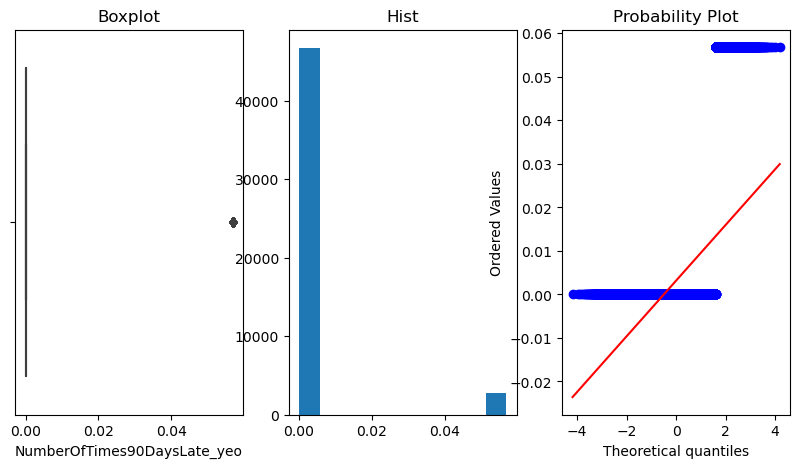

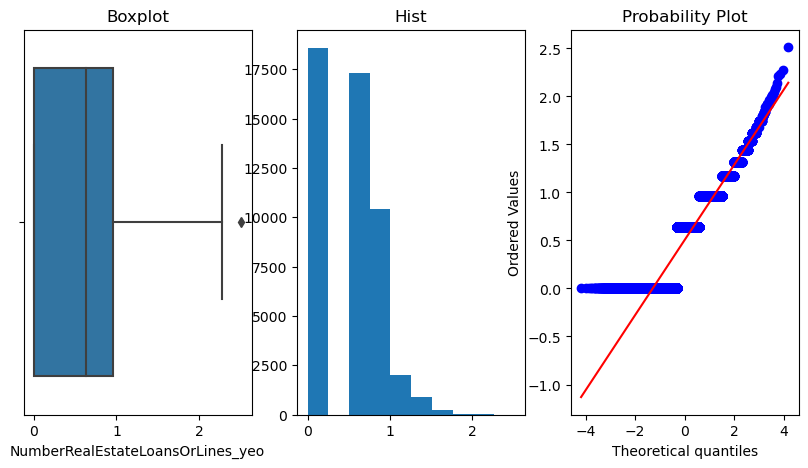

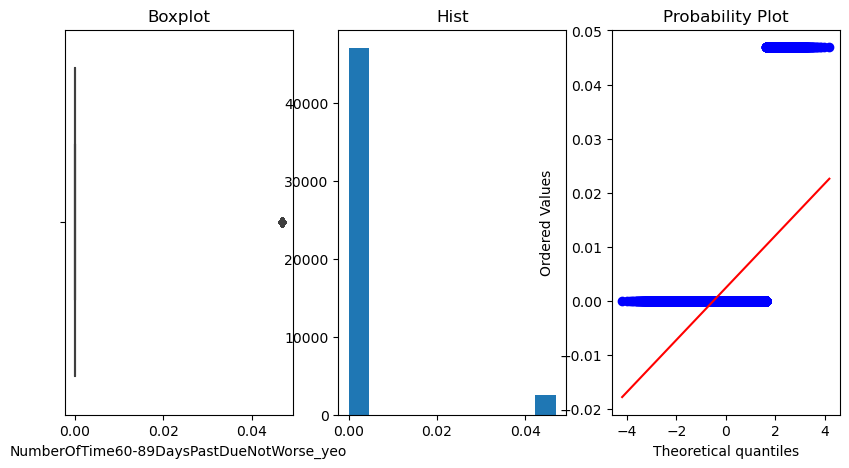

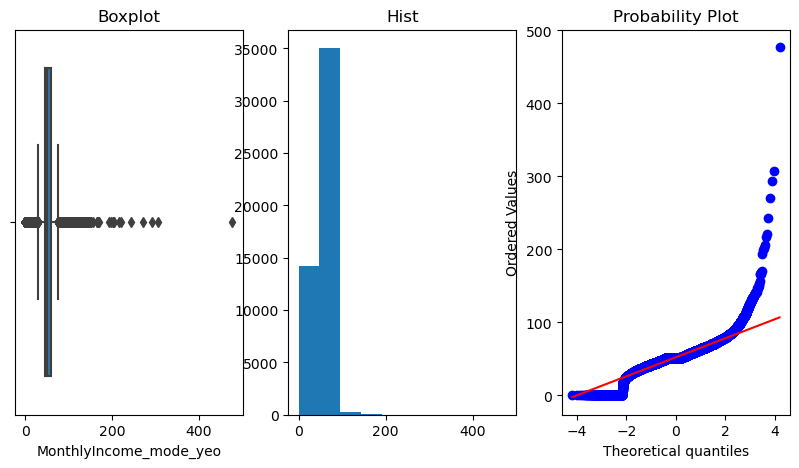

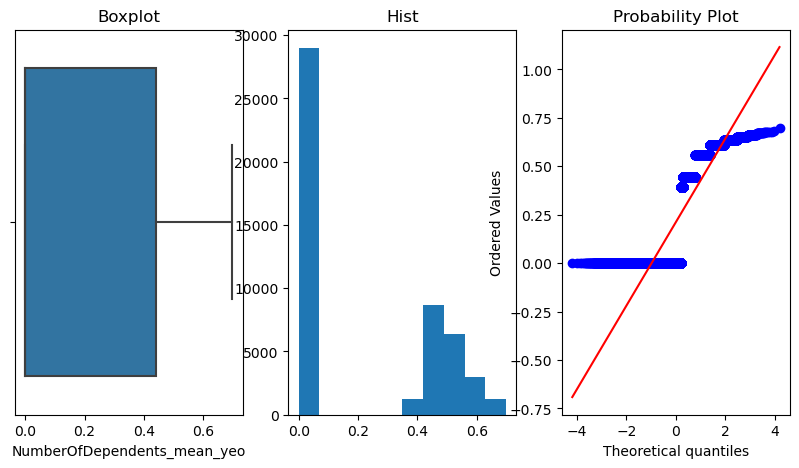

In [95]:
## Apply yeojohnson technique on testing_Data numerical

for i in testing_data_numerical.columns:
    testing_data_numerical[i+"_yeo"],alpa=stats.yeojohnson(testing_data_numerical[i])
    vt(testing_data_numerical,i+"_yeo")

In [96]:
testing_data_numerical.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_mean', 'NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo'],
      dtype='object')

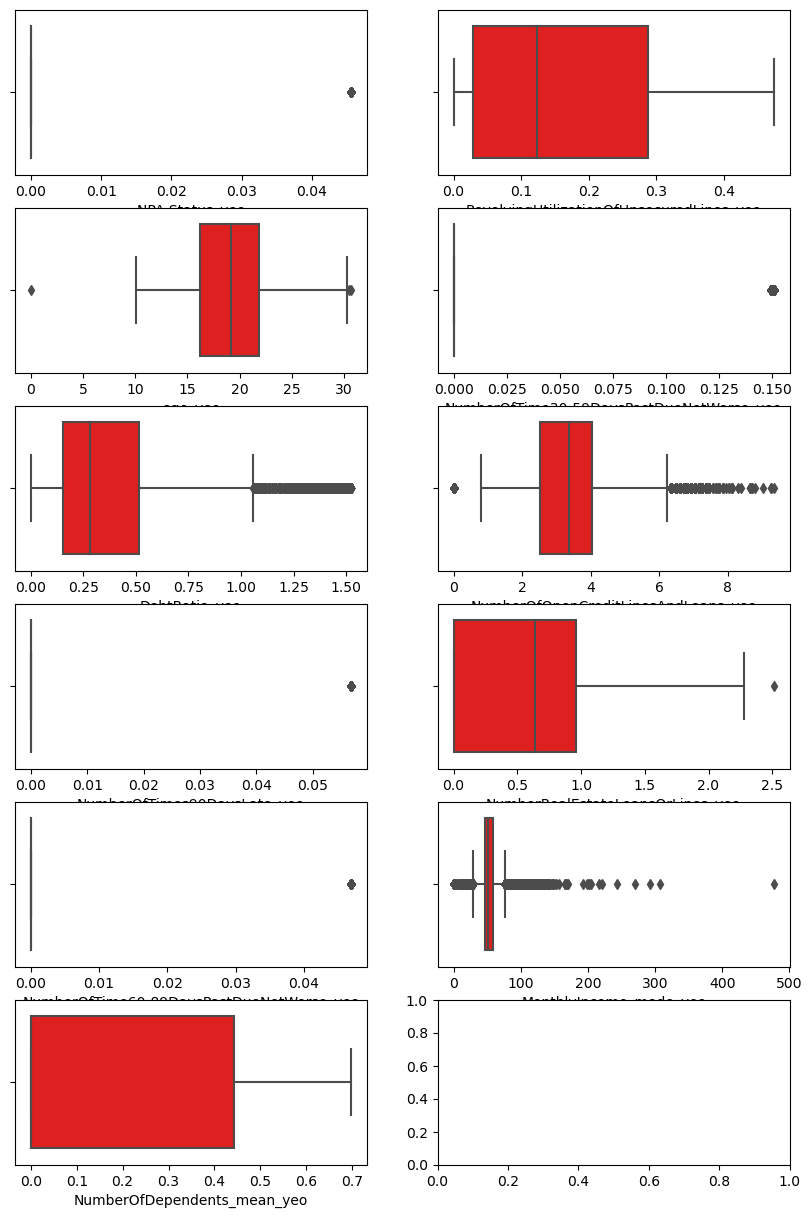

In [97]:
f=['NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo']
fig,ax=plt.subplots(6,2,figsize=(10,15))
for i,subplot in zip(f,ax.flatten()):
    sns.boxplot(x=testing_data_numerical[i],ax=subplot,color="r")

In [98]:
testing_data_numerical=testing_data_numerical.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_mean'],axis=1)

In [99]:
testing_data_numerical=testing_data_numerical.drop(c,axis=1)

In [100]:
testing_data_numerical.head()

,RevolvingUtilizationOfUnsecuredLines_yeo,age_yeo,DebtRatio_yeo,NumberOfOpenCreditLinesAndLoans_yeo,NumberRealEstateLoansOrLines_yeo,MonthlyIncome_mode_yeo,NumberOfDependents_mean_yeo
59770,0.364014,13.018911,1.398910,0.000000,-0.000000,50.882977,-0.000000
21362,-0.000000,20.427890,0.127614,3.599695,0.635467,59.579749,-0.000000
127324,0.034588,18.124880,0.198021,2.828028,0.958430,54.343368,0.607878
140509,0.366106,16.231604,0.143872,2.186167,-0.000000,50.728039,-0.000000
144297,0.365026,18.387534,1.517724,3.823382,0.635467,50.882977,-0.000000


In [101]:
testing_data_numerical.shape

(49500, 7)

In [102]:
training_data_numerical.shape

(100500, 7)

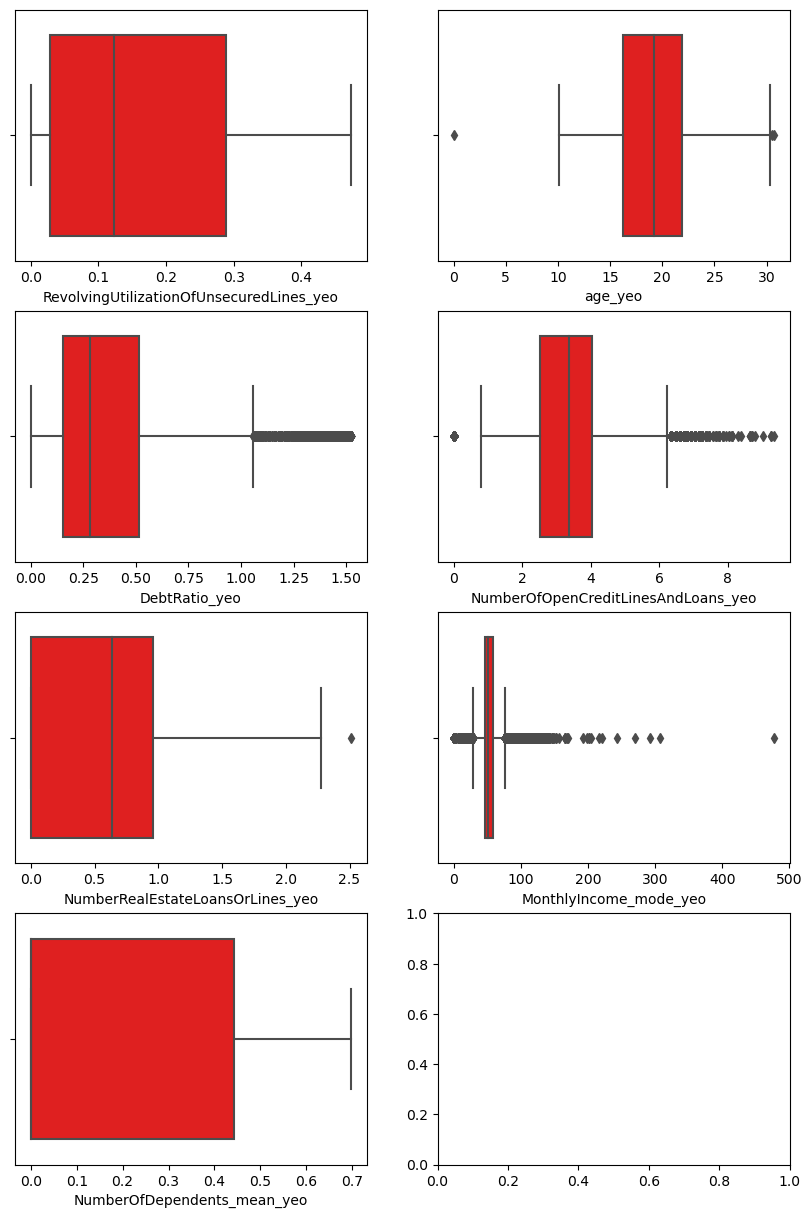

In [103]:
fig,ax=plt.subplots(4,2,figsize=(10,15))
for i,subplot in zip(testing_data_numerical.columns,ax.flatten()):
    sns.boxplot(x=testing_data_numerical[i], ax=subplot,color="r")

### since training and test dataset outliers are cleared almost 80% Iam trying to solve it even more:

In [104]:
# Lets work on training data:

def out(training_data_numerical,var):
    iqr=training_data_numerical[var].quantile(0.75)-training_data_numerical[var].quantile(0.25)
    lower=training_data_numerical[var].quantile(0.25)-(1.5*iqr)
    upper=training_data_numerical[var].quantile(0.75)+(1.5*iqr)
    return upper,lower

In [105]:
for i in training_data_numerical.columns:
    upper,lower=out(training_data_numerical,i)
    print(upper,lower)

0.6777834919610807 -0.36120772592498457
27.28624018175654 7.459560126937029
1.0487788336783757 -0.38390666032164944
6.332532474734338 0.25155718947777883
2.403605648907686 -1.4421633893446115
81.22083363200323 29.526876941139133
1.13039785705527 -0.678238714233162


In [106]:
upper,lower=out(training_data_numerical,"age_yeo")

In [107]:
upper,lower

(27.28624018175654, 7.459560126937029)

In [108]:
training_data_numerical["h"]=np.where(training_data_numerical["age_yeo"]>upper,upper,np.where(training_data_numerical["age_yeo"]<lower,lower,training_data_numerical["age_yeo"]))

<AxesSubplot:xlabel='h'>

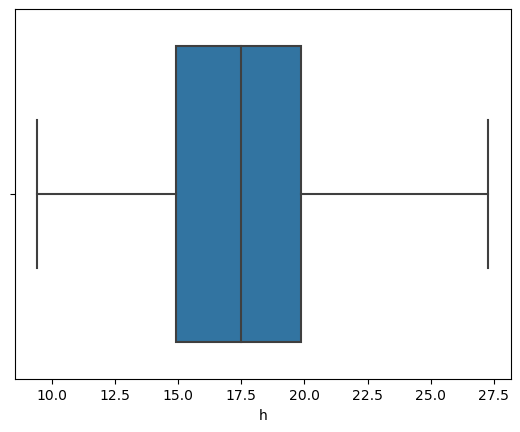

In [109]:
sns.boxplot(x=training_data_numerical["h"])

In [110]:
training_data_numerical=training_data_numerical.drop(["h"],axis=1)

In [111]:
for i in training_data_numerical.columns:
    upper,lower=out(training_data_numerical,i)
    training_data_numerical[i+"_h"]=np.where(training_data_numerical[i]>upper,upper,np.where(training_data_numerical[i]<lower,lower,training_data_numerical[i]))

In [112]:
training_data_numerical.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'NumberOfDependents_mean_yeo_h'],
      dtype='object')

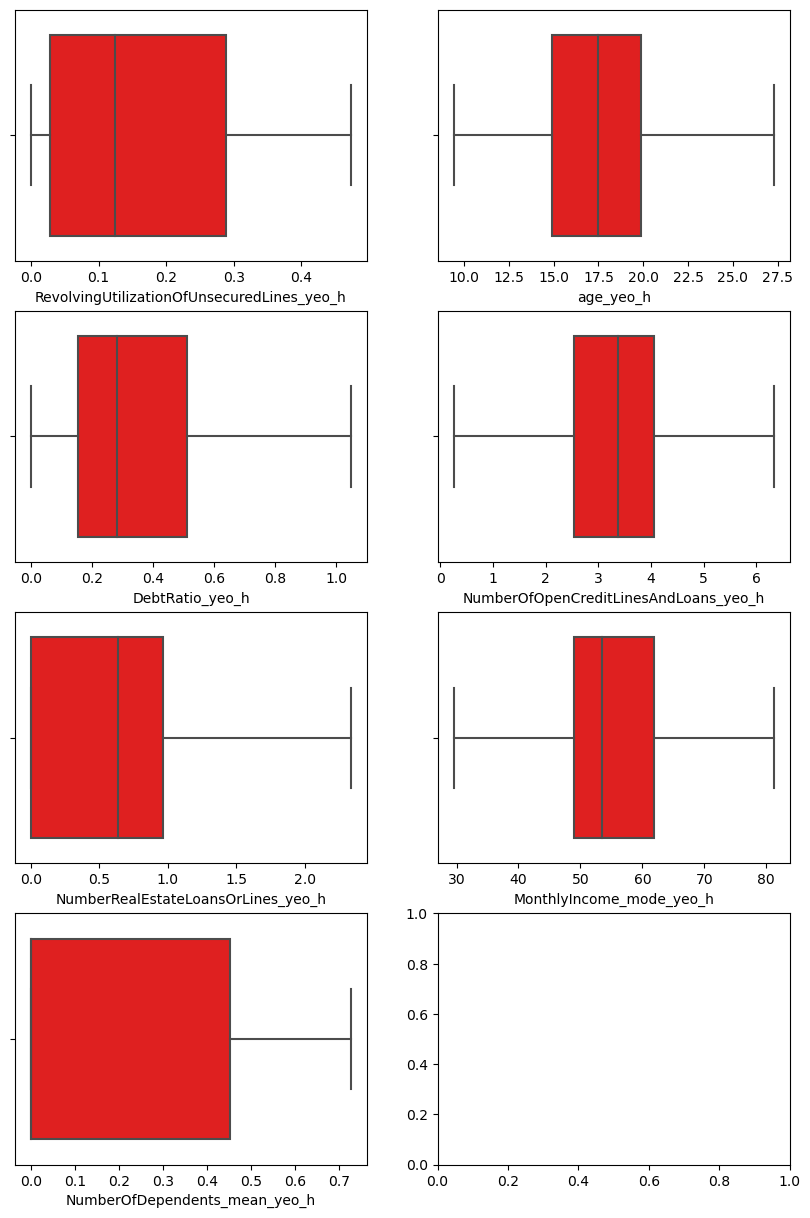

In [113]:
f=['RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'NumberOfDependents_mean_yeo_h']
fig,ax=plt.subplots(4,2,figsize=(10,15))
for i,subplot in zip(f,ax.flatten()):
    sns.boxplot(x=training_data_numerical[i],ax=subplot,color="r")

In [114]:
training_data_numerical.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'NumberOfDependents_mean_yeo_h'],
      dtype='object')

In [115]:
training_data_numerical=training_data_numerical.drop(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo'],axis=1)

In [116]:
training_data_numerical.head()

,RevolvingUtilizationOfUnsecuredLines_yeo_h,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,NumberOfDependents_mean_yeo_h
87935,0.350057,19.218351,1.048779,2.531923,-0.000000,53.536898,-0.000000
3892,0.363958,13.121298,0.056204,1.352347,-0.000000,50.744568,-0.000000
41404,0.363958,10.629580,0.136334,1.352347,-0.000000,40.222715,-0.000000
91124,0.210385,19.004802,0.302696,3.116456,0.961442,52.188052,-0.000000
67372,0.363958,17.916249,1.048779,2.531923,0.636748,53.536898,0.398009


In [117]:
training_data_numerical.shape

(100500, 7)

### same thing i need to use for test data

In [118]:
def out(testing_data_numerical,var):
    iqr=testing_data_numerical[var].quantile(0.75)-testing_data_numerical[var].quantile(0.25)
    lower=testing_data_numerical[var].quantile(0.25)-(1.5*iqr)
    upper=testing_data_numerical[var].quantile(0.75)+(1.5*iqr)
    return upper,lower

In [119]:
for i in testing_data_numerical.columns:
    upper,lower=out(testing_data_numerical,i)
    testing_data_numerical[i+"_h"]=np.where(testing_data_numerical[i]>upper,upper,np.where(testing_data_numerical[i]<lower,lower,testing_data_numerical[i]))

In [120]:
testing_data_numerical.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'NumberOfDependents_mean_yeo_h'],
      dtype='object')

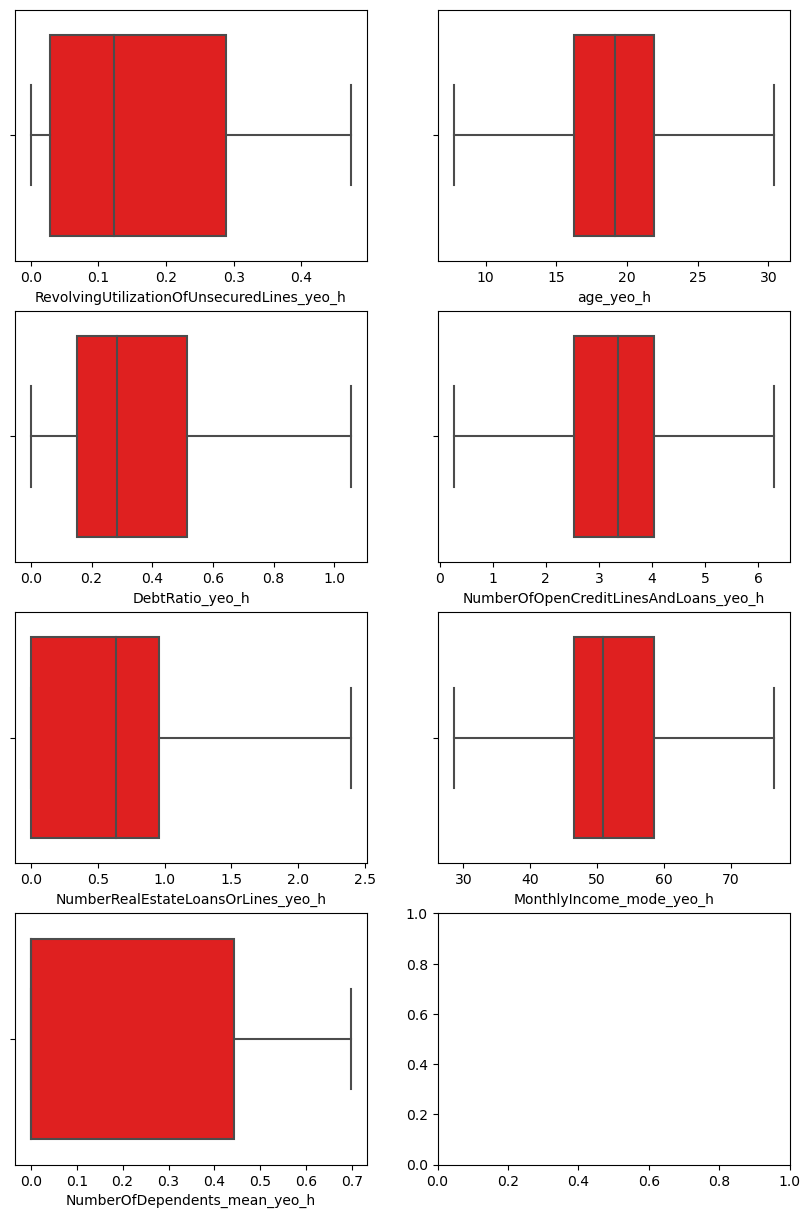

In [121]:
f=['RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'NumberOfDependents_mean_yeo_h']
fig,ax=plt.subplots(4,2,figsize=(10,15))
for i,subplot in zip(f,ax.flatten()):
    sns.boxplot(testing_data_numerical[i],ax=subplot,color="r")

In [122]:
testing_data_numerical.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'NumberOfDependents_mean_yeo_h'],
      dtype='object')

In [123]:
testing_data_numerical=testing_data_numerical.drop(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_mean_yeo'],axis=1)

In [124]:
testing_data_numerical.head()

,RevolvingUtilizationOfUnsecuredLines_yeo_h,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,NumberOfDependents_mean_yeo_h
59770,0.364014,13.018911,1.055707,0.258870,-0.000000,50.882977,-0.000000
21362,-0.000000,20.427890,0.127614,3.599695,0.635467,59.579749,-0.000000
127324,0.034588,18.124880,0.198021,2.828028,0.958430,54.343368,0.607878
140509,0.366106,16.231604,0.143872,2.186167,-0.000000,50.728039,-0.000000
144297,0.365026,18.387534,1.055707,3.823382,0.635467,50.882977,-0.000000


In [125]:
testing_data_numerical.shape

(49500, 7)

## since numerical features are completed now its time for categorical features

In [126]:
training_data_cat=training_data.select_dtypes(include="object")

In [127]:
training_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
87935,Male,Central,Rented,Non-officer,Graduate,Good
3892,Female,South,Ownhouse,Self_Emp,Matric,Good
41404,Male,North,Ownhouse,Officer1,Post-Grad,Good
91124,Male,Central,Rented,Non-officer,Graduate,Good
67372,Male,West,Ownhouse,Self_Emp,Graduate,Bad


In [128]:
# If we observe :

# Gender = Nominal Data
# Region = Nominal Data
# Rented = Ordinal
# Occupation = Ordinal
# Education = Ordinal
# Good_Bad = Label Encoding [Nominal data]

In [129]:
import sklearn

In [130]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [131]:
# Applying Onehot encoding for gender and Region

ohe=OneHotEncoder(drop="first")

q=ohe.fit_transform(training_data_cat[["Gender","Region"]])

In [132]:
q=q.toarray()

In [133]:
ohe.get_feature_names()

array(['x0_Male', 'x1_East', 'x1_North', 'x1_South', 'x1_West'],
      dtype=object)

In [134]:
sol=pd.DataFrame(q,index=training_data_cat.index,columns=ohe.get_feature_names())

In [135]:
sol

,x0_Male,x1_East,x1_North,x1_South,x1_West
87935,1.0,0.0,0.0,0.0,0.0
3892,0.0,0.0,0.0,1.0,0.0
41404,1.0,0.0,1.0,0.0,0.0
91124,1.0,0.0,0.0,0.0,0.0
67372,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
119879,1.0,0.0,0.0,0.0,1.0
103694,1.0,0.0,0.0,0.0,1.0
131932,1.0,1.0,0.0,0.0,0.0
146867,1.0,0.0,0.0,1.0,0.0


In [136]:
training_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
87935,Male,Central,Rented,Non-officer,Graduate,Good
3892,Female,South,Ownhouse,Self_Emp,Matric,Good
41404,Male,North,Ownhouse,Officer1,Post-Grad,Good
91124,Male,Central,Rented,Non-officer,Graduate,Good
67372,Male,West,Ownhouse,Self_Emp,Graduate,Bad


In [137]:
training_data_cat=pd.concat([training_data_cat,sol],axis=1)

In [138]:
training_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West
87935,Male,Central,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
3892,Female,South,Ownhouse,Self_Emp,Matric,Good,0.0,0.0,0.0,1.0,0.0
41404,Male,North,Ownhouse,Officer1,Post-Grad,Good,1.0,0.0,1.0,0.0,0.0
91124,Male,Central,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
67372,Male,West,Ownhouse,Self_Emp,Graduate,Bad,1.0,0.0,0.0,0.0,1.0


In [139]:
training_data_cat=training_data_cat.drop(["Gender","Region"],axis=1)

In [140]:
training_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West
87935,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
3892,Ownhouse,Self_Emp,Matric,Good,0.0,0.0,0.0,1.0,0.0
41404,Ownhouse,Officer1,Post-Grad,Good,1.0,0.0,1.0,0.0,0.0
91124,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
67372,Ownhouse,Self_Emp,Graduate,Bad,1.0,0.0,0.0,0.0,1.0


In [141]:
testing_data_cat=testing_data.select_dtypes(include="object")
testing_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
59770,Male,Central,Rented,Self_Emp,Professional,Good
21362,Female,North,Rented,Officer3,Post-Grad,Good
127324,Female,East,Rented,Officer1,Post-Grad,Good
140509,Male,West,Rented,Non-officer,Professional,Good
144297,Male,West,Rented,Officer2,Professional,Good


In [142]:
q=ohe.transform(testing_data_cat[["Gender","Region"]])

In [143]:
q=q.toarray()

In [144]:
ohe.get_feature_names()

array(['x0_Male', 'x1_East', 'x1_North', 'x1_South', 'x1_West'],
      dtype=object)

In [145]:
sol=pd.DataFrame(q,index=testing_data_cat.index,columns=ohe.get_feature_names())

In [146]:
sol

,x0_Male,x1_East,x1_North,x1_South,x1_West
59770,1.0,0.0,0.0,0.0,0.0
21362,0.0,0.0,1.0,0.0,0.0
127324,0.0,1.0,0.0,0.0,0.0
140509,1.0,0.0,0.0,0.0,1.0
144297,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
134069,1.0,0.0,0.0,0.0,1.0
87920,1.0,0.0,0.0,0.0,0.0
120536,1.0,0.0,0.0,0.0,1.0
141500,1.0,0.0,0.0,0.0,1.0


In [147]:
testing_data_cat=pd.concat([testing_data_cat,sol],axis=1)

In [148]:
testing_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West
59770,Male,Central,Rented,Self_Emp,Professional,Good,1.0,0.0,0.0,0.0,0.0
21362,Female,North,Rented,Officer3,Post-Grad,Good,0.0,0.0,1.0,0.0,0.0
127324,Female,East,Rented,Officer1,Post-Grad,Good,0.0,1.0,0.0,0.0,0.0
140509,Male,West,Rented,Non-officer,Professional,Good,1.0,0.0,0.0,0.0,1.0
144297,Male,West,Rented,Officer2,Professional,Good,1.0,0.0,0.0,0.0,1.0


In [149]:
testing_data_cat=testing_data_cat.drop(["Gender","Region"],axis=1)

In [150]:
testing_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West
59770,Rented,Self_Emp,Professional,Good,1.0,0.0,0.0,0.0,0.0
21362,Rented,Officer3,Post-Grad,Good,0.0,0.0,1.0,0.0,0.0
127324,Rented,Officer1,Post-Grad,Good,0.0,1.0,0.0,0.0,0.0
140509,Rented,Non-officer,Professional,Good,1.0,0.0,0.0,0.0,1.0
144297,Rented,Officer2,Professional,Good,1.0,0.0,0.0,0.0,1.0


### one hot endcoing for Gender and Region or completed

#### Now handle Ordinal categorical columns

In [151]:
from sklearn.preprocessing import OrdinalEncoder
s=OrdinalEncoder()
q=s.fit_transform(training_data_cat[["Rented_OwnHouse","Occupation","Education"]])
q

array([[1., 0., 0.],
       [0., 4., 1.],
       [0., 1., 3.],
       ...,
       [1., 1., 4.],
       [1., 4., 4.],
       [1., 4., 3.]])

In [152]:
d=pd.DataFrame(q,index=training_data_cat.index)
d.columns=["Rented_OwnHouse_replace","Occupation_replace","Education_replace"]

In [153]:
d.head()

,Rented_OwnHouse_replace,Occupation_replace,Education_replace
87935,1.0,0.0,0.0
3892,0.0,4.0,1.0
41404,0.0,1.0,3.0
91124,1.0,0.0,0.0
67372,0.0,4.0,0.0


In [154]:
training_data_cat=pd.concat([training_data_cat,d],axis=1)

In [155]:
training_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace
87935,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3892,Ownhouse,Self_Emp,Matric,Good,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
41404,Ownhouse,Officer1,Post-Grad,Good,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
91124,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67372,Ownhouse,Self_Emp,Graduate,Bad,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0


In [156]:
training_data_cat=training_data_cat.drop(["Rented_OwnHouse","Occupation","Education"],axis=1)

In [157]:
training_data_cat.head()

,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace
87935,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3892,Good,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
41404,Good,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
91124,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67372,Bad,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0


In [158]:
### same concept we need to apply on testing data categorical

q=s.transform(testing_data_cat[["Rented_OwnHouse","Occupation","Education"]])
q

array([[1., 4., 4.],
       [1., 3., 3.],
       [1., 1., 3.],
       ...,
       [1., 0., 0.],
       [0., 4., 4.],
       [1., 4., 4.]])

In [159]:
d=pd.DataFrame(q,index=testing_data_cat.index)
d.columns=["Rented_OwnHouse_replace","Occupation_replace","Education_replace"]

In [160]:
d.head()

,Rented_OwnHouse_replace,Occupation_replace,Education_replace
59770,1.0,4.0,4.0
21362,1.0,3.0,3.0
127324,1.0,1.0,3.0
140509,1.0,0.0,4.0
144297,1.0,2.0,4.0


In [161]:
testing_data_cat=pd.concat([testing_data_cat,d],axis=1)

In [162]:
testing_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace
59770,Rented,Self_Emp,Professional,Good,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
21362,Rented,Officer3,Post-Grad,Good,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
127324,Rented,Officer1,Post-Grad,Good,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
140509,Rented,Non-officer,Professional,Good,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
144297,Rented,Officer2,Professional,Good,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0


In [163]:
testing_data_cat=testing_data_cat.drop(["Rented_OwnHouse","Occupation","Education"],axis=1)

In [164]:
testing_data_cat.head()

,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace
59770,Good,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
21362,Good,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
127324,Good,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
140509,Good,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
144297,Good,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0


### focus on dependent variable

In [165]:
from sklearn.preprocessing import LabelEncoder
p=LabelEncoder()

q=p.fit_transform(training_data_cat["Good_Bad"])
q

array([1, 1, 1, ..., 1, 1, 1])

In [166]:
sol=pd.DataFrame(q,index=training_data_cat.index)
sol.columns=["Good_Bad_replace"]

In [167]:
sol.head()

,Good_Bad_replace
87935,1
3892,1
41404,1
91124,1
67372,0


In [168]:
training_data_cat=pd.concat([training_data_cat,sol],axis=1)

In [169]:
training_data_cat.head()

,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
87935,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,Good,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,Good,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,Bad,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


In [170]:
training_data_cat=training_data_cat.drop(["Good_Bad"],axis=1)

In [171]:
training_data_cat.head()

,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
87935,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


In [172]:
### now same thing we need to apply on testing data 

In [173]:
q=p.transform(testing_data_cat["Good_Bad"])

sol=pd.DataFrame(q,index=testing_data_cat.index)
sol.columns=["Good_Bad_replace"]
sol.head()

,Good_Bad_replace
59770,1
21362,1
127324,1
140509,1
144297,1


In [174]:
testing_data_cat=pd.concat([testing_data_cat,sol],axis=1)

In [175]:
testing_data_cat.head()

,Good_Bad,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
59770,Good,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,Good,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,Good,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,Good,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,Good,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


In [176]:
testing_data_cat=testing_data_cat.drop(["Good_Bad"],axis=1)

In [177]:
testing_data_cat.head()

,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
59770,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


## Finally feature engineering part completed, now it's time for Feature selection

In [178]:
final_train_data=pd.concat([training_data_numerical,training_data_cat],axis=1)

In [179]:
final_train_data

,RevolvingUtilizationOfUnsecuredLines_yeo_h,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,NumberOfDependents_mean_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
87935,0.350057,19.218351,1.048779,2.531923,-0.000000,53.536898,-0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,0.363958,13.121298,0.056204,1.352347,-0.000000,50.744568,-0.000000,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,0.363958,10.629580,0.136334,1.352347,-0.000000,40.222715,-0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,0.210385,19.004802,0.302696,3.116456,0.961442,52.188052,-0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,0.363958,17.916249,1.048779,2.531923,0.636748,53.536898,0.398009,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.003159,15.619962,0.282956,3.116456,0.961442,69.029879,0.631409,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1
103694,0.077023,20.677978,1.048779,3.839502,0.636748,53.536898,0.452159,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1
131932,0.062064,16.789749,0.436390,3.374112,0.961442,43.175235,-0.000000,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,1
146867,0.162176,13.640573,0.024796,1.352347,-0.000000,34.140489,-0.000000,1.0,0.0,0.0,1.0,0.0,1.0,4.0,4.0,1


In [180]:
final_test_data=pd.concat([testing_data_numerical,testing_data_cat],axis=1)
final_test_data.head()

,RevolvingUtilizationOfUnsecuredLines_yeo_h,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,NumberOfDependents_mean_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
59770,0.364014,13.018911,1.055707,0.258870,-0.000000,50.882977,-0.000000,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,-0.000000,20.427890,0.127614,3.599695,0.635467,59.579749,-0.000000,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,0.034588,18.124880,0.198021,2.828028,0.958430,54.343368,0.607878,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,0.366106,16.231604,0.143872,2.186167,-0.000000,50.728039,-0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,0.365026,18.387534,1.055707,3.823382,0.635467,50.882977,-0.000000,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


In [181]:
final_train_data.shape

(100500, 16)

In [182]:
final_test_data.shape

(49500, 16)

In [183]:
## constant feature selection method

from sklearn.feature_selection import VarianceThreshold

In [184]:
var=VarianceThreshold(threshold=0.0)
var.fit(final_train_data)
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [185]:
# quasi constant feature selection method

var=VarianceThreshold(threshold=0.1)
var.fit(final_train_data)
var.get_support()

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [186]:
c=final_train_data.columns[var.get_support()]
c

Index(['age_yeo_h', 'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'x0_Male', 'x1_East', 'x1_North', 'x1_South', 'x1_West',
       'Rented_OwnHouse_replace', 'Occupation_replace', 'Education_replace'],
      dtype='object')

In [187]:
# unwanted Columns

un=final_train_data.columns[~var.get_support()]
un

Index(['RevolvingUtilizationOfUnsecuredLines_yeo_h',
       'NumberOfDependents_mean_yeo_h', 'Good_Bad_replace'],
      dtype='object')

In [188]:
final_train_data=final_train_data.drop(['RevolvingUtilizationOfUnsecuredLines_yeo_h','NumberOfDependents_mean_yeo_h'],axis=1)
final_train_data.head()

,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
87935,19.218351,1.048779,2.531923,-0.000000,53.536898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,13.121298,0.056204,1.352347,-0.000000,50.744568,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,10.629580,0.136334,1.352347,-0.000000,40.222715,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,19.004802,0.302696,3.116456,0.961442,52.188052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,17.916249,1.048779,2.531923,0.636748,53.536898,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


In [189]:
# same apply on test data

final_test_data=final_test_data.drop(['RevolvingUtilizationOfUnsecuredLines_yeo_h','NumberOfDependents_mean_yeo_h'],axis=1)
final_test_data.head()

,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
59770,13.018911,1.055707,0.258870,-0.000000,50.882977,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,20.427890,0.127614,3.599695,0.635467,59.579749,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,18.124880,0.198021,2.828028,0.958430,54.343368,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,16.231604,0.143872,2.186167,-0.000000,50.728039,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,18.387534,1.055707,3.823382,0.635467,50.882977,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


In [190]:
final_test_data.shape

(49500, 14)

In [191]:
final_train_data.shape

(100500, 14)

- Let's try to use correlation and try to see any correlated features are there

In [192]:
final_train_data.head()

,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
87935,19.218351,1.048779,2.531923,-0.000000,53.536898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,13.121298,0.056204,1.352347,-0.000000,50.744568,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,10.629580,0.136334,1.352347,-0.000000,40.222715,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,19.004802,0.302696,3.116456,0.961442,52.188052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,17.916249,1.048779,2.531923,0.636748,53.536898,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


### since correlation is used only for numerical columns Iam using only for numerical features:

In [193]:
a=['age_yeo_h', 'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h']

In [194]:
a

['age_yeo_h',
 'DebtRatio_yeo_h',
 'NumberOfOpenCreditLinesAndLoans_yeo_h',
 'NumberRealEstateLoansOrLines_yeo_h',
 'MonthlyIncome_mode_yeo_h']

In [195]:
d=final_train_data.iloc[:,0:5]
d.head()

,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h
87935,19.218351,1.048779,2.531923,-0.000000,53.536898
3892,13.121298,0.056204,1.352347,-0.000000,50.744568
41404,10.629580,0.136334,1.352347,-0.000000,40.222715
91124,19.004802,0.302696,3.116456,0.961442,52.188052
67372,17.916249,1.048779,2.531923,0.636748,53.536898


<AxesSubplot:>

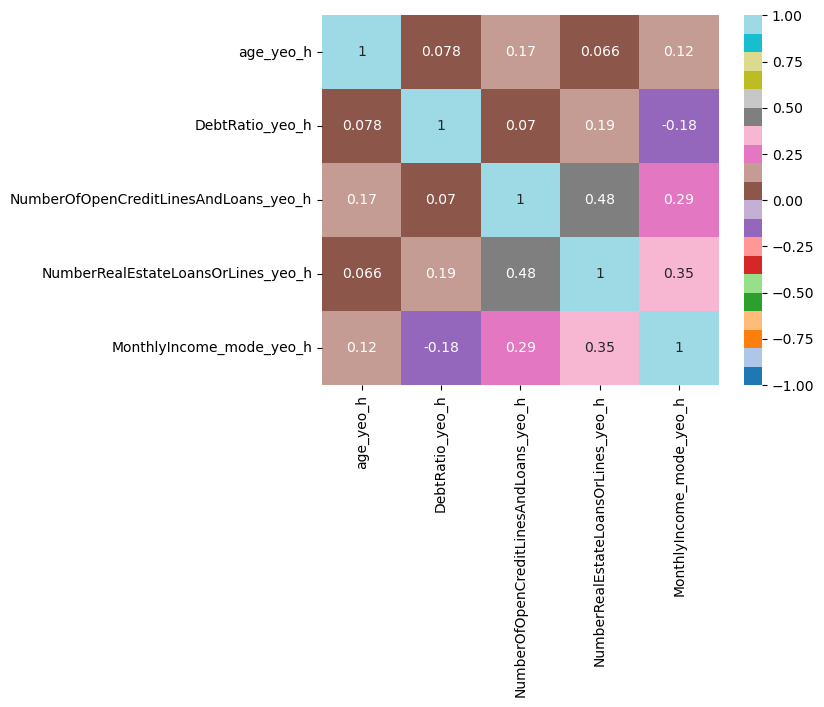

In [196]:
corr=d.corr()
sns.heatmap(data=corr,vmin=-1,vmax=1,cmap="tab20",annot=True)

In [197]:
import feature_engine

In [198]:
from feature_engine.selection import DropCorrelatedFeatures

cor=DropCorrelatedFeatures(method="pearson",threshold=0.85)

cor.fit(d)

DropCorrelatedFeatures(threshold=0.85)

In [199]:
cor.features_to_drop_

set()

In [200]:
cor=DropCorrelatedFeatures(method="spearman",threshold=0.85)
cor.fit(d)

DropCorrelatedFeatures(method='spearman', threshold=0.85)

In [201]:
cor.features_to_drop_

set()

#### using pearson concept with dependent varible might have chance to select ones
- using hypothesis testing:

In [202]:
from scipy.stats import pearsonr

corr=[]
for i in d.columns:
    sol=pearsonr(final_train_data[i],final_train_data["Good_Bad_replace"])
    corr.append(sol)
corr

[PearsonRResult(statistic=0.11764144693225695, pvalue=1.595445725698892e-306),
 PearsonRResult(statistic=-0.0033639269683126954, pvalue=0.2862370034889983),
 PearsonRResult(statistic=0.04751153774307393, pvalue=2.5393891408231603e-51),
 PearsonRResult(statistic=0.031568352734177144, pvalue=1.3763328389428906e-23),
 PearsonRResult(statistic=0.05524711531992154, pvalue=8.842837840283196e-69)]

In [203]:
corr=np.array(corr)
corr

array([[ 1.17641447e-001,  1.59544573e-306],
       [-3.36392697e-003,  2.86237003e-001],
       [ 4.75115377e-002,  2.53938914e-051],
       [ 3.15683527e-002,  1.37633284e-023],
       [ 5.52471153e-002,  8.84283784e-069]])

In [204]:
p_value_num=pd.Series(corr[:,1],index=d.columns)
p_value_num

age_yeo_h                                1.595446e-306
DebtRatio_yeo_h                           2.862370e-01
NumberOfOpenCreditLinesAndLoans_yeo_h     2.539389e-51
NumberRealEstateLoansOrLines_yeo_h        1.376333e-23
MonthlyIncome_mode_yeo_h                  8.842838e-69
dtype: float64

In [205]:
p_value_num=p_value_num.sort_values(ascending=True)
p_value_num

age_yeo_h                                1.595446e-306
MonthlyIncome_mode_yeo_h                  8.842838e-69
NumberOfOpenCreditLinesAndLoans_yeo_h     2.539389e-51
NumberRealEstateLoansOrLines_yeo_h        1.376333e-23
DebtRatio_yeo_h                           2.862370e-01
dtype: float64

<AxesSubplot:>

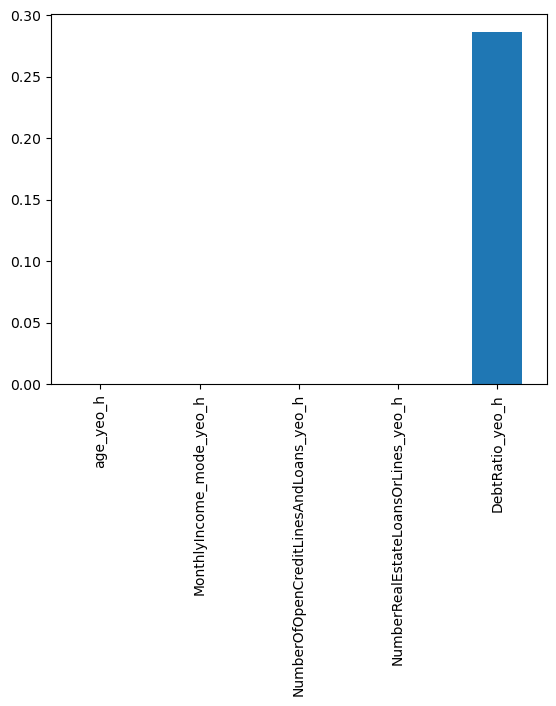

In [206]:
p_value_num.plot.bar()

#### according to hypothesis testing null hypothesis is rejecting and alternate hypothesis is selected 
- p_value of 'DebtRation_yeo_h' >0.05, hence it is not important, so i will remove it

In [207]:
final_train_data=final_train_data.drop(["DebtRatio_yeo_h"],axis=1)

In [208]:
final_train_data.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
87935,19.218351,2.531923,-0.000000,53.536898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,13.121298,1.352347,-0.000000,50.744568,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,10.629580,1.352347,-0.000000,40.222715,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,19.004802,3.116456,0.961442,52.188052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,17.916249,2.531923,0.636748,53.536898,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


In [209]:
final_test_data=final_test_data.drop(["DebtRatio_yeo_h"],axis=1)
final_test_data.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
59770,13.018911,0.258870,-0.000000,50.882977,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,20.427890,3.599695,0.635467,59.579749,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,18.124880,2.828028,0.958430,54.343368,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,16.231604,2.186167,-0.000000,50.728039,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,18.387534,3.823382,0.635467,50.882977,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


### Feature selection for categorical data
-  we use chi square test with dependent variable

In [210]:
final_train_data.columns

Index(['age_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'x0_Male', 'x1_East', 'x1_North', 'x1_South', 'x1_West',
       'Rented_OwnHouse_replace', 'Occupation_replace', 'Education_replace',
       'Good_Bad_replace'],
      dtype='object')

In [211]:
d=final_train_data.iloc[:,4:]
d.head()

,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
87935,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


In [212]:
from sklearn.feature_selection import chi2
corr=[]
for i in d.columns:
    sol=chi2(final_train_data[i],final_train_data["Good_Bad_replace"])
    corr.append(sol)
corr=np.array(corr)
corr

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. ... 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [213]:
final_train_data.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
87935,19.218351,2.531923,-0.000000,53.536898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,13.121298,1.352347,-0.000000,50.744568,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,10.629580,1.352347,-0.000000,40.222715,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,19.004802,3.116456,0.961442,52.188052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,17.916249,2.531923,0.636748,53.536898,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


In [214]:
final_test_data.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
59770,13.018911,0.258870,-0.000000,50.882977,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,20.427890,3.599695,0.635467,59.579749,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,18.124880,2.828028,0.958430,54.343368,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,16.231604,2.186167,-0.000000,50.728039,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,18.387534,3.823382,0.635467,50.882977,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


### now it's time for model development: but we need to check whether the data is balanced or not:
- scaling process

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
print(sum(final_train_data["Good_Bad_replace"]==0))
print(sum(final_train_data["Good_Bad_replace"]==1))

6773
93727


In [217]:
## checking whether the data is balanced or not

print("The value 1 in dependent variable = ",sum(final_train_data["Good_Bad_replace"]==1))
print("The value 0 in dependent variable = ",sum(final_train_data["Good_Bad_replace"]==0))

# for maintain data balanced we are using upsampling 

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train,y_train=sm.fit_resample(final_train_data.iloc[:,:-1],final_train_data.iloc[:,-1])

print("------------------------------------------------------------------------------------------")
print("The value 1 in dependent variable= ",sum(y_train==1))
print("The value 0 in dependent variable= ",sum(y_train==0))

The value 1 in dependent variable =  93727
The value 0 in dependent variable =  6773
------------------------------------------------------------------------------------------
The value 1 in dependent variable=  93727
The value 0 in dependent variable=  93727


In [218]:
final_test_data.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace,Good_Bad_replace
59770,13.018911,0.258870,-0.000000,50.882977,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,20.427890,3.599695,0.635467,59.579749,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,18.124880,2.828028,0.958430,54.343368,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,16.231604,2.186167,-0.000000,50.728039,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,18.387534,3.823382,0.635467,50.882977,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


In [219]:
X_test=final_test_data.iloc[:,:-1]
y_test=final_test_data.iloc[:,-1]

In [220]:
X_test.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace
59770,13.018911,0.258870,-0.000000,50.882977,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
21362,20.427890,3.599695,0.635467,59.579749,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
127324,18.124880,2.828028,0.958430,54.343368,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
140509,16.231604,2.186167,-0.000000,50.728039,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
144297,18.387534,3.823382,0.635467,50.882977,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0


In [221]:
y_test.head()

59770     1
21362     1
127324    1
140509    1
144297    1
Name: Good_Bad_replace, dtype: int32

### Now scaling the values before giving to model

In [222]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc.fit(X_train)

StandardScaler()

In [223]:
X_train1=sc.transform(X_train)
X_test1=sc.transform(X_test)

In [224]:
X_train1

array([[ 0.78307362, -0.50149974, -1.14263938, ...,  1.20260213,
        -1.36611912, -1.38150612],
       [-1.09444291, -1.42803983, -1.14263938, ..., -0.90741148,
         0.98520895, -0.75240769],
       [-1.8617384 , -1.42803983, -1.14263938, ..., -0.90741148,
        -0.7782871 ,  0.50578918],
       ...,
       [-0.48270371, -0.96238158, -0.08669554, ...,  1.20260213,
        -0.7782871 , -0.75240769],
       [-1.95276625, -0.2702098 , -1.14263938, ...,  1.20260213,
         0.98520895, -1.38150612],
       [ 0.66409375, -0.84327188, -0.54328852, ...,  0.35711944,
         0.98520895, -0.75240769]])

In [225]:
X_test1

array([[-1.12597182, -2.28695017, -1.14263938, ...,  1.20260213,
         0.98520895,  1.13488762],
       [ 1.15553689,  0.33722013,  0.35010916, ...,  1.20260213,
         0.39737694,  0.50578918],
       [ 0.44635177, -0.26891329,  1.1087702 , ...,  1.20260213,
        -0.7782871 ,  0.50578918],
       ...,
       [ 3.08613634, -0.50754748,  0.35010916, ...,  1.20260213,
        -1.36611912, -1.38150612],
       [ 1.60738366,  0.33722013,  2.23750793, ..., -0.90741148,
         0.98520895,  1.13488762],
       [ 0.2828707 , -0.77308633,  0.35010916, ...,  1.20260213,
         0.98520895,  1.13488762]])

In [226]:
X_train1=pd.DataFrame(X_train1,columns=X_train.columns)

In [227]:
X_train1.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace
0,0.783074,-0.501500,-1.142639,-0.032102,0.813679,-0.351688,-0.579865,-0.440909,-0.718276,1.202602,-1.366119,-1.381506
1,-1.094443,-1.428040,-1.142639,-0.276460,-1.330141,-0.351688,-0.579865,2.388623,-0.718276,-0.907411,0.985209,-0.752408
2,-1.861738,-1.428040,-1.142639,-1.197233,0.813679,-0.351688,1.809493,-0.440909,-0.718276,-0.907411,-0.778287,0.505789
3,0.717313,-0.042357,1.115845,-0.150140,0.813679,-0.351688,-0.579865,-0.440909,-0.718276,1.202602,-1.366119,-1.381506
4,0.382106,-0.501500,0.353120,-0.032102,0.813679,-0.351688,-0.579865,-0.440909,1.465388,-0.907411,0.985209,-1.381506


In [228]:
X_test1=pd.DataFrame(X_test1,columns=X_test.columns)

In [229]:
X_test1.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,x0_Male,x1_East,x1_North,x1_South,x1_West,Rented_OwnHouse_replace,Occupation_replace,Education_replace
0,-1.125972,-2.286950,-1.142639,-0.264348,0.813679,-0.351688,-0.579865,-0.440909,-0.718276,1.202602,0.985209,1.134888
1,1.155537,0.337220,0.350109,0.496710,-1.330141,-0.351688,1.809493,-0.440909,-0.718276,1.202602,0.397377,0.505789
2,0.446352,-0.268913,1.108770,0.038472,-1.330141,2.964636,-0.579865,-0.440909,-0.718276,1.202602,-0.778287,0.505789
3,-0.136661,-0.773086,-1.142639,-0.277907,0.813679,-0.351688,-0.579865,-0.440909,1.465388,1.202602,-1.366119,1.134888
4,0.527233,0.512922,0.350109,-0.264348,0.813679,-0.351688,-0.579865,-0.440909,1.465388,1.202602,-0.190455,1.134888


### Let's build the model

In [230]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [231]:
def KNN(X_train,X_test,y_train,y_test):
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    y_train_pred=knn.predict(X_train)
    print("----Training Accuracy----")
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred))
    y_test_pred=knn.predict(X_test)
    print("----Test Accuracy --------")
    print("Testing Accuracy= ",accuracy_score(y_test,y_test_pred))
    print("-------Confusion Matrix---------")
    print(confusion_matrix(y_test,y_test_pred))
    print("--------Classification Report -----------------")
    print(classification_report(y_test,y_test_pred))

In [232]:
from sklearn.linear_model import LogisticRegression

In [233]:
def LR(X_train,X_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_train_pred=lr.predict(X_train)
    print("----Training Accuracy----")
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred))
    y_test_pred=lr.predict(X_test)
    print("----Test Accuracy --------")
    print("Testing Accuracy= ",accuracy_score(y_test,y_test_pred))
    print("-------Confusion Matrix---------")
    print(confusion_matrix(y_test,y_test_pred))
    print("--------Classification Report -----------------")
    print(classification_report(y_test,y_test_pred))

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
def DT(X_train,X_test,y_train,y_test):
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    y_train_pred=dt.predict(X_train)
    print("----Training Accuracy----")
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred))
    y_test_pred=dt.predict(X_test)
    print("----Test Accuracy --------")
    print("Testing Accuracy= ",accuracy_score(y_test,y_test_pred))
    print("-------Confusion Matrix---------")
    print(confusion_matrix(y_test,y_test_pred))
    print("--------Classification Report -----------------")
    print(classification_report(y_test,y_test_pred))

In [236]:
from sklearn.naive_bayes import GaussianNB

In [237]:
def NB(X_train,X_test,y_train,y_test):
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    y_train_pred=nb.predict(X_train)
    print("----Training Accuracy----")
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred))
    y_test_pred=nb.predict(X_test)
    print("----Test Accuracy --------")
    print("Testing Accuracy= ",accuracy_score(y_test,y_test_pred))
    print("-------Confusion Matrix---------")
    print(confusion_matrix(y_test,y_test_pred))
    print("--------Classification Report -----------------")
    print(classification_report(y_test,y_test_pred))

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
def RF(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=100)
    rf.fit(X_train,y_train)
    y_train_pred=rf.predict(X_train)
    print("----Training Accuracy----")
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred))
    y_test_pred=rf.predict(X_test)
    print("----Test Accuracy --------")
    print("Testing Accuracy= ",accuracy_score(y_test,y_test_pred))
    print("-------Confusion Matrix---------")
    print(confusion_matrix(y_test,y_test_pred))
    print("--------Classification Report -----------------")
    print(classification_report(y_test,y_test_pred))

In [240]:
def calling(X_train,X_test,y_train,y_test):
    print("-------KNN-----------")
    KNN(X_train,X_test,y_train,y_test)
    print("-----Logistic Regression ---------")
    LR(X_train,X_test,y_train,y_test)
    print("--------Naive Bayes --------------")
    NB(X_train,X_test,y_train,y_test)
    print("---------Decision Tree ------------")
    DT(X_train,X_test,y_train,y_test)
    print("---------Random Forest ------------")
    RF(X_train,X_test,y_train,y_test)

In [241]:
calling(X_train1,X_test1,y_train,y_test)

-------KNN-----------
----Training Accuracy----
Training Accuracy =  0.9551783370853649
----Test Accuracy --------
Testing Accuracy=  0.8703838383838384
-------Confusion Matrix---------
[[ 1544  1709]
 [ 4707 41540]]
--------Classification Report -----------------
              precision    recall  f1-score   support

           0       0.25      0.47      0.32      3253
           1       0.96      0.90      0.93     46247

    accuracy                           0.87     49500
   macro avg       0.60      0.69      0.63     49500
weighted avg       0.91      0.87      0.89     49500

-----Logistic Regression ---------
----Training Accuracy----
Training Accuracy =  0.7382504507772574
----Test Accuracy --------
Testing Accuracy=  0.7377373737373737
-------Confusion Matrix---------
[[ 2277   976]
 [12006 34241]]
--------Classification Report -----------------
              precision    recall  f1-score   support

           0       0.16      0.70      0.26      3253
           1       0.

- It is difficult for us to select the trained models:
    - using AUC and Roc I will find best one

In [242]:
from sklearn.metrics import roc_curve

In [243]:
# Model training

r1=KNeighborsClassifier()
r2=LogisticRegression()
r3=GaussianNB()
r4=DecisionTreeClassifier()
r5=RandomForestClassifier()

# model fitting

r1.fit(X_train1,y_train)
r2.fit(X_train1,y_train)
r3.fit(X_train1,y_train)
r4.fit(X_train1,y_train)
r5.fit(X_train1,y_train)

#Model testing

y_k=r1.predict_proba(X_test1)[:,1]
y_l=r2.predict_proba(X_test1)[:,1]
y_n=r3.predict_proba(X_test1)[:,1]
y_d=r4.predict_proba(X_test1)[:,1]
y_r=r5.predict_proba(X_test1)[:,1]

# finding fpr and tpr for all models

fprk,tprk,threshold=roc_curve(y_test,y_k)
fprl,tprl,threshold=roc_curve(y_test,y_l)
fprn,tprn,threshold=roc_curve(y_test,y_n)
fprd,tprd,threshold=roc_curve(y_test,y_d)
fprr,tprr,threshold=roc_curve(y_test,y_r)

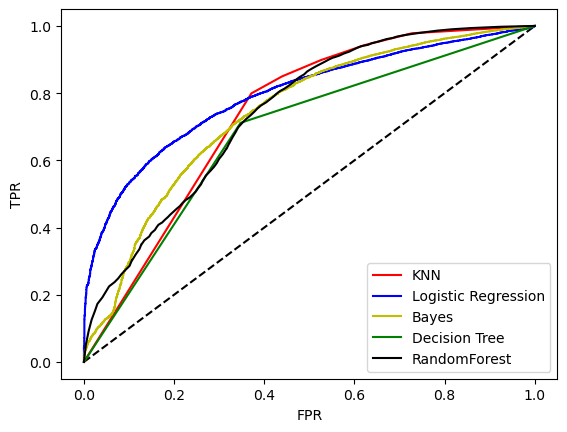

In [244]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fprk,tprk,label="KNN",color="r")
plt.plot(fprl,tprl,label="Logistic Regression",color="b")
plt.plot(fprn,tprn,label="Bayes",color="y")
plt.plot(fprd,tprd,label="Decision Tree",color="g")
plt.plot(fprr,tprr,label="RandomForest",color="black")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=0)
plt.show()

### here after checking AUC  and ROC curves  Logistic Regression has high result so Iam finalizing my model

#### making logistic regression works better , we can use Hyperparameter tuning technique

In [245]:
from sklearn.model_selection import GridSearchCV

In [246]:
 X_train1.columns

Index(['age_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'x0_Male', 'x1_East', 'x1_North', 'x1_South', 'x1_West',
       'Rented_OwnHouse_replace', 'Occupation_replace', 'Education_replace'],
      dtype='object')

In [247]:
def pred(values):
    values=np.array(values)
    values=values.reshape(1,-1)
    p=sc.transform(values)
    sol=r2.predict(p)
    if sol==1:
        print("Good Transaction")
    else:
        print("Bad Transaction")

In [248]:
pred([24,2,4,30000,1,0,0,1,0,1,2,2])

Good Transaction


In [259]:
pred(X_train.iloc[4,:])

Bad Transaction


# save the model

In [1]:
import pickle

In [261]:
with open("credit_project.pkl","wb") as f:
    pickle.dump(r2,f)

In [2]:
model=pickle.load(open("credit_project.pkl","rb"))

In [263]:
def pred1(values):
    values=np.array(values)
    values=values.reshape(1,-1)
    p=sc.transform(values)
    sol=model.predict(p)
    if sol==1:
        print("Good Transaction")
    else:
        print("Bad Transaction")

In [264]:
pred1(X_train.iloc[4,:])

Bad Transaction


In [266]:
pred1(X_train.iloc[0,:])

Good Transaction


In [3]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [4]:
with open("standard_Scaler.pkl","wb") as f:
    pickle.dump(sc,f)